In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from scipy import stats as st
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import random as r
import math as m
from math import *
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/healthcare-dataset-stroke-data.csv")
df

Mounted at /content/drive


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# EXPLORATORY DATA ANALYSIS

In [ ]:
df[df['age']==0.08]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [ ]:
df1 = df.copy()

In [ ]:
df2 = df.copy()

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.size

61320

In [ ]:
df.ndim

2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.sample(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4617,13307,Male,57.0,0,0,Yes,Govt_job,Urban,75.53,33.1,formerly smoked,0
2127,15440,Female,36.0,0,0,Yes,Private,Rural,114.16,21.3,smokes,0
991,66494,Male,48.0,0,0,Yes,Private,Urban,91.96,24.9,Unknown,0


In [ ]:
df.iloc[[603, 621, 639, 654, 668]][:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
603,61408,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
621,42553,Female,80.0,0,0,Yes,Private,Rural,148.91,28.3,never smoked,0
639,63693,Male,37.0,0,0,No,Private,Urban,67.39,35.6,Unknown,0
654,30567,Male,71.0,1,0,Yes,Private,Urban,94.65,25.3,formerly smoked,0
668,68995,Female,48.0,1,0,No,Private,Rural,118.14,NaN,formerly smoked,0


In [ ]:
df.iloc[[3663]]['stroke']

3663    0
Name: stroke, dtype: int64

In [ ]:
df.set_index("id", drop = True, inplace = True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [ ]:
df.loc[[31112]]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [ ]:
df.loc[[18234],['stroke']]

,stroke
id,
18234,0


In [ ]:
df.loc[df.gender=='Male'][['stroke']].count()

stroke    2115
dtype: int64

In [ ]:
df.loc[[19723], 'avg_glucose_level':'stroke']

,avg_glucose_level,bmi,smoking_status,stroke
id,,,,
19723,82.99,30.6,never smoked,0


In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

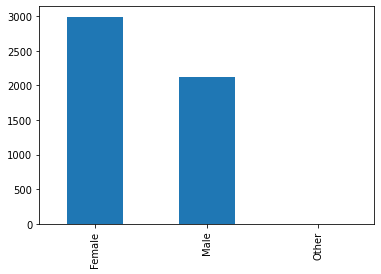

In [ ]:
df['gender'].value_counts().plot(kind='bar')

In [ ]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df[(df['age'] > 50) & (df['heart_disease']==1)][['age','heart_disease']].head()

,age,heart_disease
id,,
9046,67.0,1
31112,80.0,1
53882,74.0,1
12095,61.0,1
8213,78.0,1


In [ ]:
df.loc[df['smoking_status'].str.contains('never')]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0


In [ ]:
df.groupby(['gender','stroke'])['stroke'].count().unstack()

stroke,0,1
gender,,
Female,2853.0,141.0
Male,2007.0,108.0
Other,1.0,NaN


In [ ]:
pd.crosstab(index=df['age'],columns='count').sort_values(['count'],ascending=False)

col_0,count
age,
78.00,102
57.00,95
52.00,90
54.00,87
51.00,86
...,...
1.40,3
0.16,3
0.48,3


In [ ]:
df.groupby('stroke')['age','avg_glucose_level'].mean() #Average age and estimated salary

<ipython-input-31-cb8ab1832f21>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('stroke')['age','avg_glucose_level'].mean() #Average age and estimated salary


,age,avg_glucose_level
stroke,,
0,41.971545,104.795513
1,67.728193,132.544739


# FEATURE ENGINEERING

## HANDLING MISSING & NULL VALUES

In [ ]:
df1.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

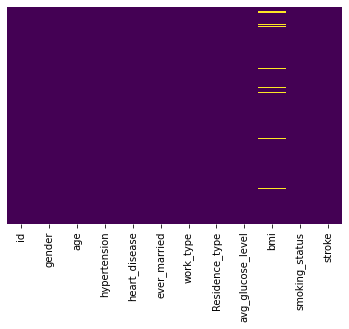

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
print(df1['bmi'].mean())
print(df1['bmi'].median())

28.893236911794666
28.1


In [ ]:
bmi_mean=df1['bmi'].mean()
df1['bmi']=df1['bmi'].fillna(bmi_mean)

In [ ]:
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

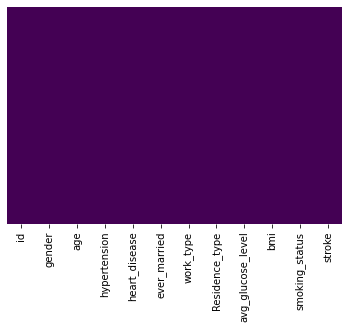

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df1.duplicated().sum()

0

# DATA VISUALIZATION

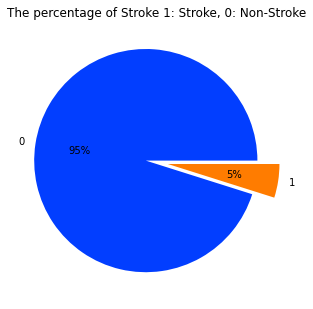

In [ ]:
data = df["stroke"].value_counts()
labels = df["stroke"].value_counts().index

fig = plt.figure(figsize =(5, 7))
palette_color = sns.color_palette('bright')
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%', explode=[0.1, 0.1])
plt.title("The percentage of Stroke 1: Stroke, 0: Non-Stroke");


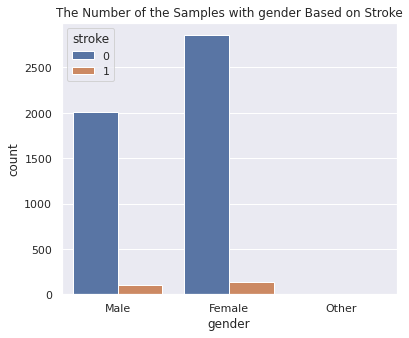

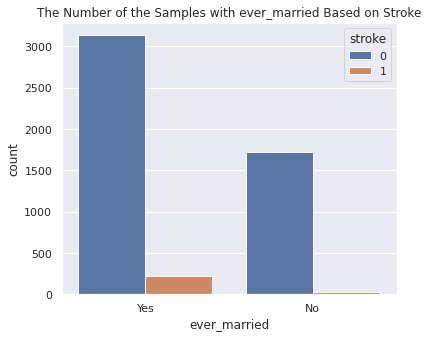

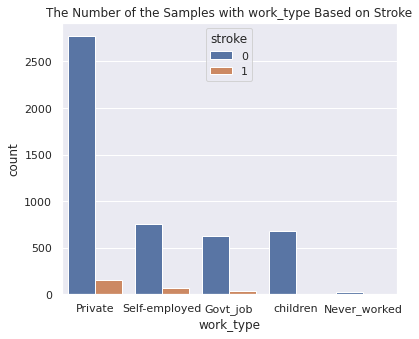

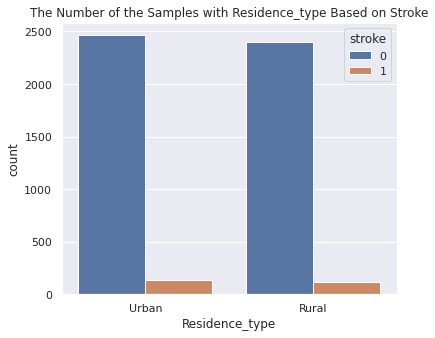

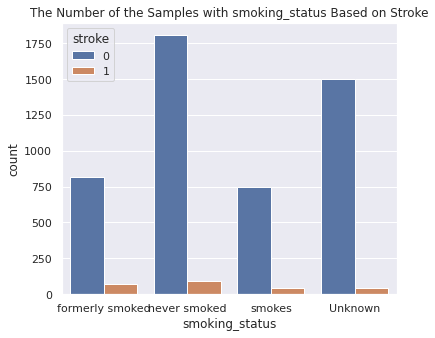

In [ ]:
plt.rcParams['figure.figsize']=(6.0,5.0)
sns.set_theme(style = 'darkgrid')
for i in df.columns[:-1]:  # exclude stroke column
    if (df[i].dtype == 'object'):
            sns.countplot(data = df, x = i, hue = 'stroke')
            plt.title('The Number of the Samples with {} Based on Stroke'.format(i))
            plt.show()

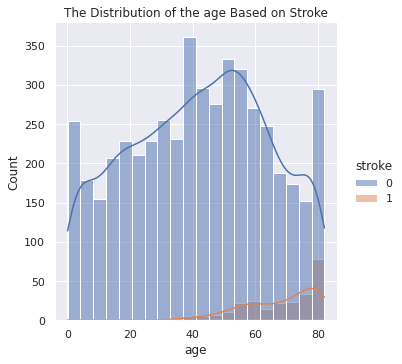

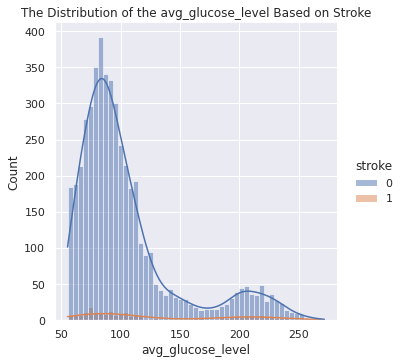

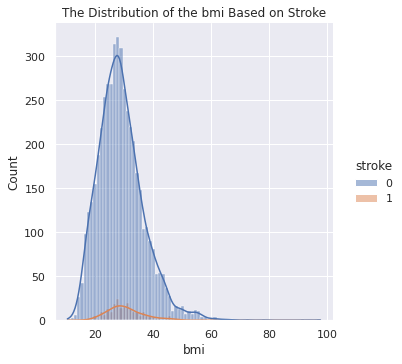

In [ ]:
sns.set_theme(style = 'darkgrid')
for i in df.columns[:-1]: # exclude stroke column
    if df[i].dtype == 'float64':
            sns.displot(data = df, x = i, hue = 'stroke', kde = True)
            plt.title('The Distribution of the {} Based on Stroke'.format(i))
            plt.show()

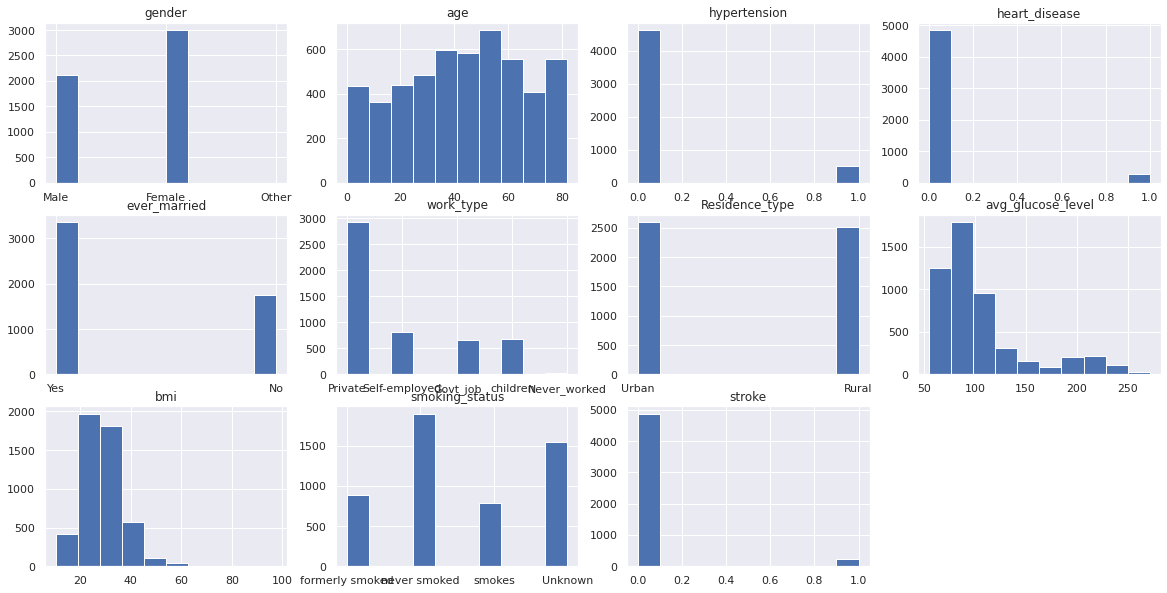

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
index = 1
for column in df.columns:
    plt.subplot(3,4,index)
    plt.title(column)
    plt.hist(df[column], label=column)
    index += 1
plt.show()

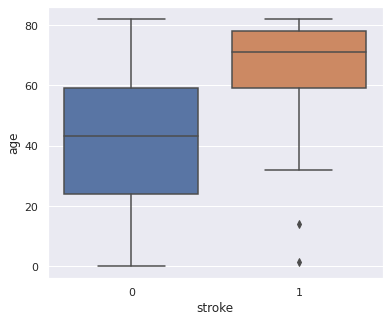

In [ ]:
plt.rcParams["figure.figsize"] = (6,5)
sns.boxplot(data=df, x="stroke", y='age') #checking for outliers

In [ ]:
df1.shape

(5110, 12)

In [ ]:
strokee = df[df['stroke']==1]

In [ ]:
Q1 = np.percentile(strokee['age'], 25,interpolation = 'midpoint')
Q3 = np.percentile(strokee['age'], 75,interpolation = 'midpoint')

In [ ]:
Q1

59.0

In [ ]:
Q3

78.0

In [ ]:
IQR = Q3 - Q1
print(IQR)

19.0


In [ ]:
upper = np.where(strokee['age'] >= (Q3+1.5*IQR))
lower = np.where(strokee['age'] <= (Q1-1.5*IQR))

In [ ]:
print(upper[0])
print(lower[0])

[]
[162 245]


In [ ]:
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

In [ ]:
df1.shape

(5108, 12)

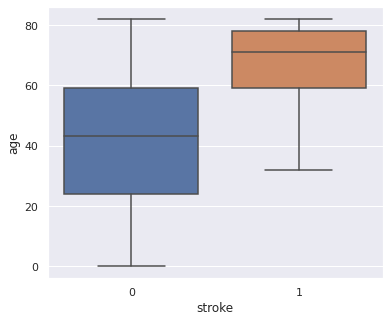

In [ ]:
plt.rcParams["figure.figsize"] = (6,5)
sns.boxplot(data=df1, x="stroke", y='age') #Removed outliers

0    4861
1     249
Name: stroke, dtype: int64


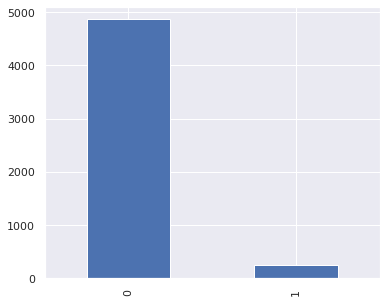

In [ ]:
print(df['stroke'].value_counts())
df['stroke'].value_counts().sort_index().plot.bar()

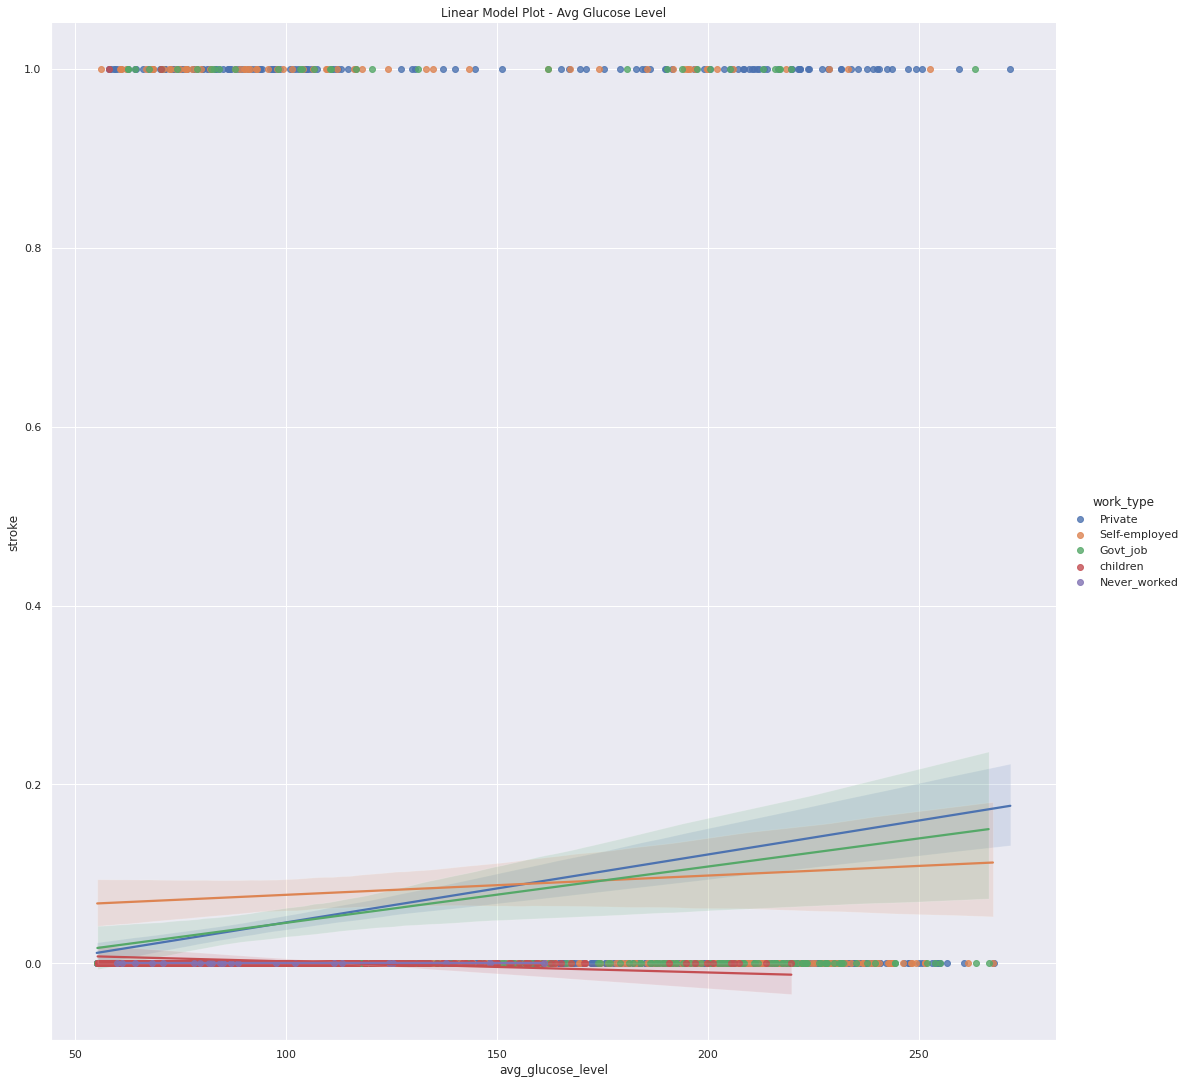

In [ ]:
sns.lmplot(x='avg_glucose_level',y='stroke',data = df, height=15, hue='work_type')
x = plt.gca()
x.set_title('Linear Model Plot - Avg Glucose Level')
plt.show()

Text(0.5, 1.0, 'avg_glucose_level')

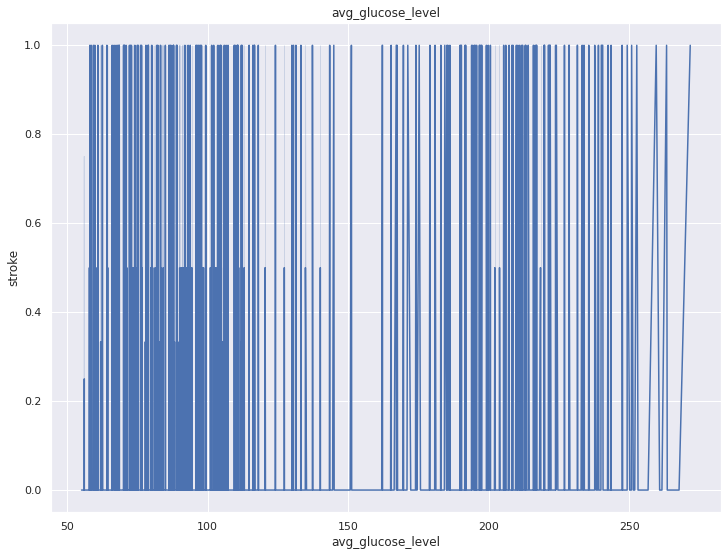

In [ ]:
plt.rcParams['figure.figsize']=(12.0,9.0)
sns.lineplot(x="avg_glucose_level", y="stroke", data=df)
sns.set(style='dark')
plt.title('avg_glucose_level')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot - BMI')

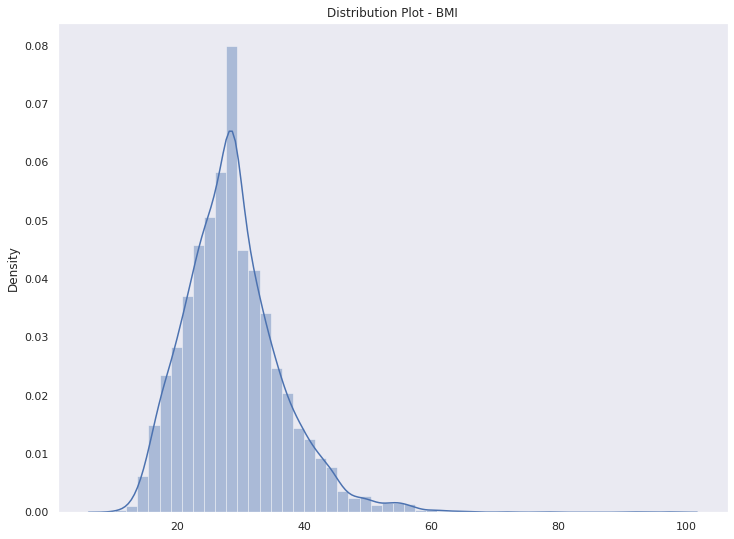

In [ ]:
bmi_values=df1.iloc[:]['bmi'].values
sns.distplot(x=bmi_values)
plt.title('Distribution Plot - BMI')

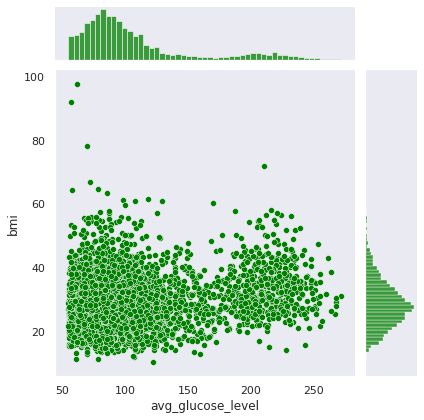

In [ ]:
sns.jointplot(x='avg_glucose_level',y='bmi',color="green",data=df)

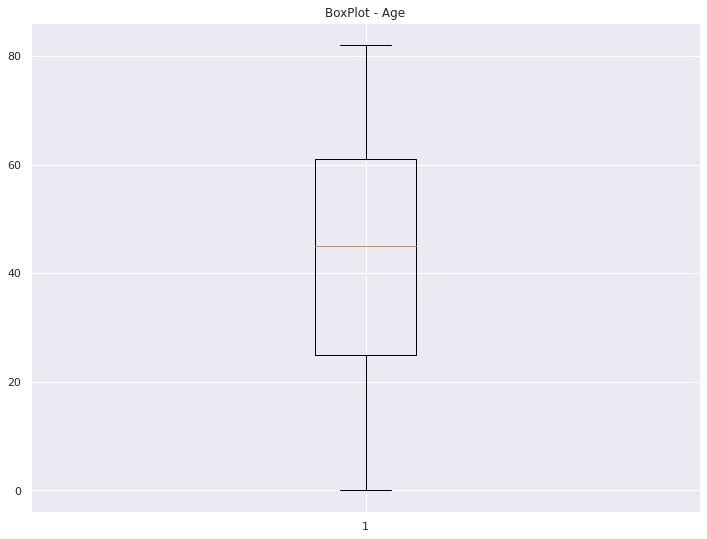

In [ ]:
age_values=df.iloc[:]['age'].values
plt.boxplot(age_values)
plt.title('BoxPlot - Age')
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot - Age')

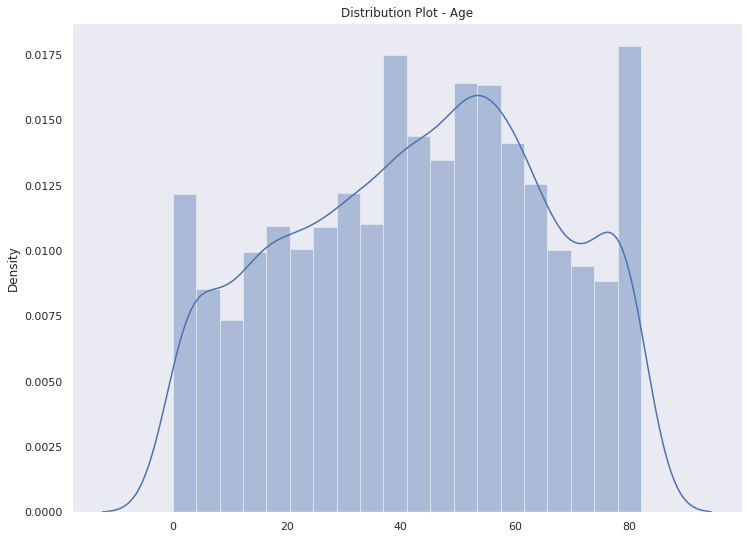

In [ ]:
sns.distplot(x=age_values)
plt.title('Distribution Plot - Age')

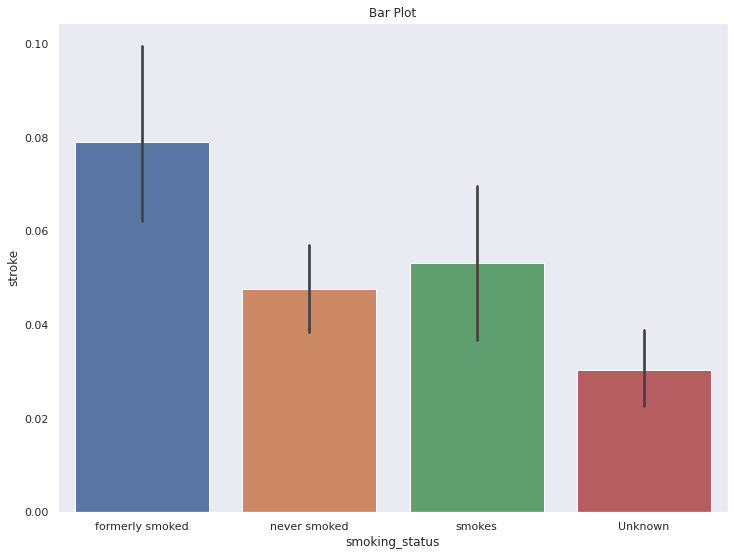

In [ ]:
plt.rcParams['figure.figsize']=(12.0,9.0)
sns.barplot(x='smoking_status', y='stroke', data=df)
plt.title('Bar Plot')
plt.show()

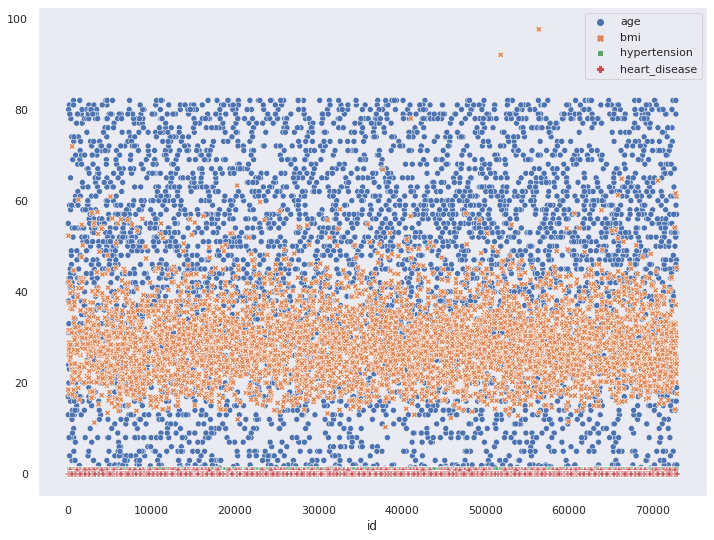

In [ ]:
sns.scatterplot(data=df[['age','bmi','smoking_status','hypertension','heart_disease','Residence_type','work_type','gender']])

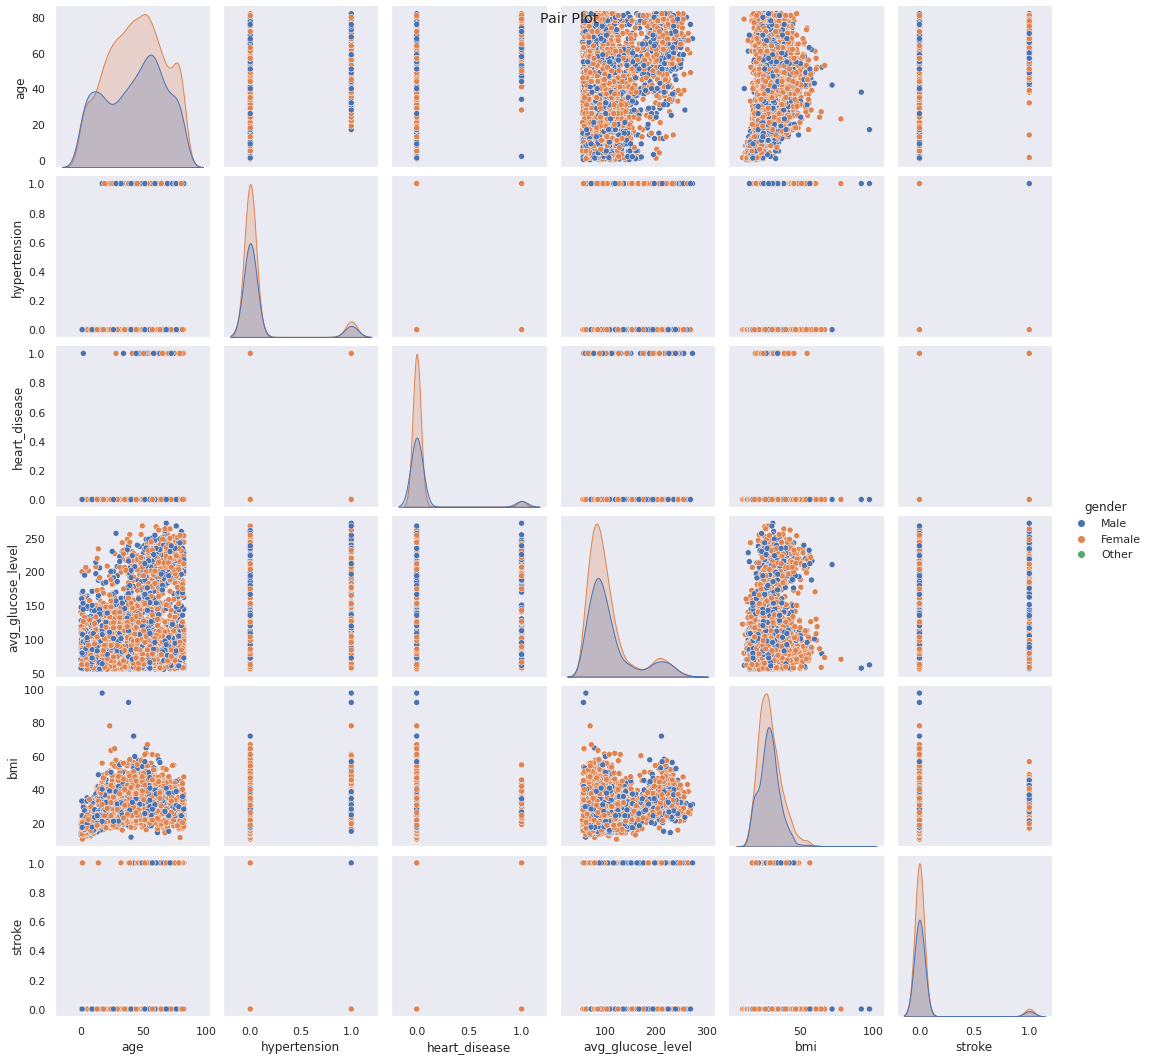

In [ ]:
pp = sns.pairplot(data=df, hue='gender')
pp.fig.suptitle('Pair Plot')
plt.show()

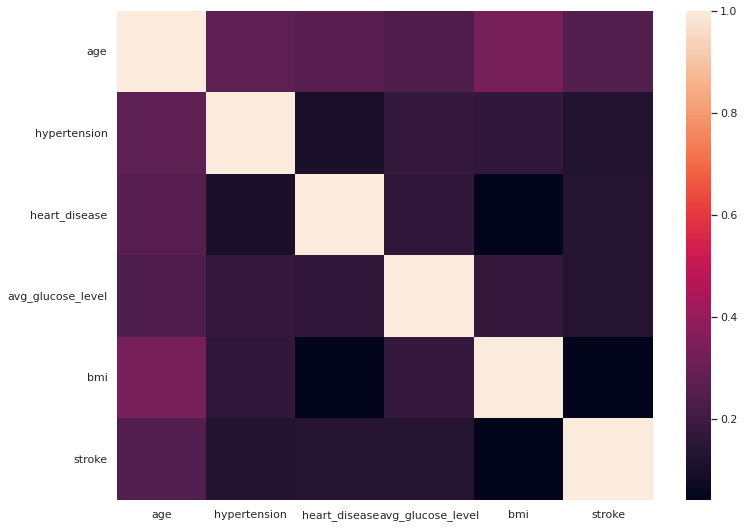

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.groupby(['stroke']).stroke.count()

stroke
0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df.groupby(['smoking_status']).smoking_status.count()

smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# ENCODING

In [ ]:
# Categorical Columns: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

one_hot_encoder = OneHotEncoder()

df_temp = one_hot_encoder.fit_transform(df1[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).toarray()


encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(),data = df_temp)
encodings = encodings.astype(int)
df1 = pd.concat([df1,encodings] , axis=1)


df1.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],axis = 1, inplace=True)
df1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.0,67.0,0.0,1.0,228.69,36.600000,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676.0,61.0,0.0,0.0,202.21,28.893237,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.0,80.0,0.0,1.0,105.92,32.500000,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182.0,49.0,0.0,0.0,171.23,34.400000,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
a = len(df1[df1['gender_Female'] == 1])
print("Number of Females:",a)

Number of Females: 2992


In [ ]:
b = len(df1[df1['gender_Male'] == 1])
print("Number of Males:",b)

Number of Males: 2115


In [ ]:
df1.isnull().sum()

id                                2
age                               2
hypertension                      2
heart_disease                     2
avg_glucose_level                 2
bmi                               2
stroke                            2
gender_Female                     2
gender_Male                       2
gender_Other                      2
ever_married_No                   2
ever_married_Yes                  2
work_type_Govt_job                2
work_type_Never_worked            2
work_type_Private                 2
work_type_Self-employed           2
work_type_children                2
Residence_type_Rural              2
Residence_type_Urban              2
smoking_status_Unknown            2
smoking_status_formerly smoked    2
smoking_status_never smoked       2
smoking_status_smokes             2
dtype: int64

In [ ]:
df1=df1.dropna()

In [ ]:
df1.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [ ]:
df1.dtypes

id                                float64
age                               float64
hypertension                      float64
heart_disease                     float64
avg_glucose_level                 float64
bmi                               float64
stroke                            float64
gender_Female                     float64
gender_Male                       float64
gender_Other                      float64
ever_married_No                   float64
ever_married_Yes                  float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
Residence_type_Rural              float64
Residence_type_Urban              float64
smoking_status_Unknown            float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
dtype: object

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

0.0    4859
1.0     247
Name: stroke, dtype: int64


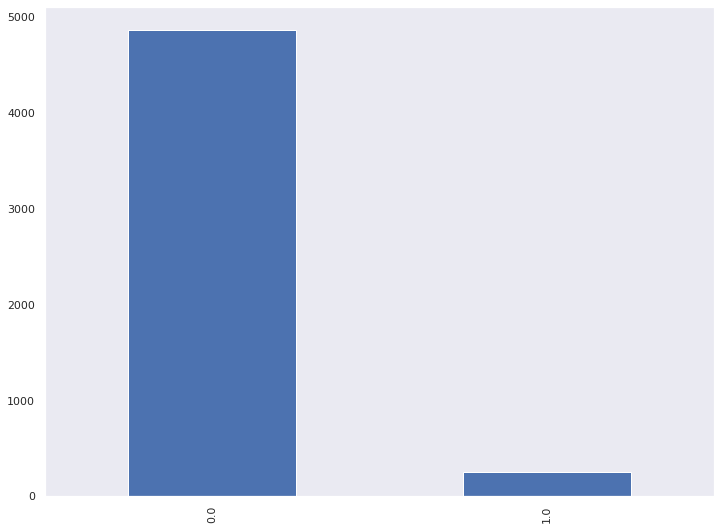

In [ ]:
print(df1['stroke'].value_counts())
df1['stroke'].value_counts().sort_index().plot.bar()

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X=df1.drop(['stroke'],axis=1)
y=df1['stroke']
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
# Apply oversampling
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X, y.ravel())

1.0    4859
0.0    4859
Name: stroke, dtype: int64


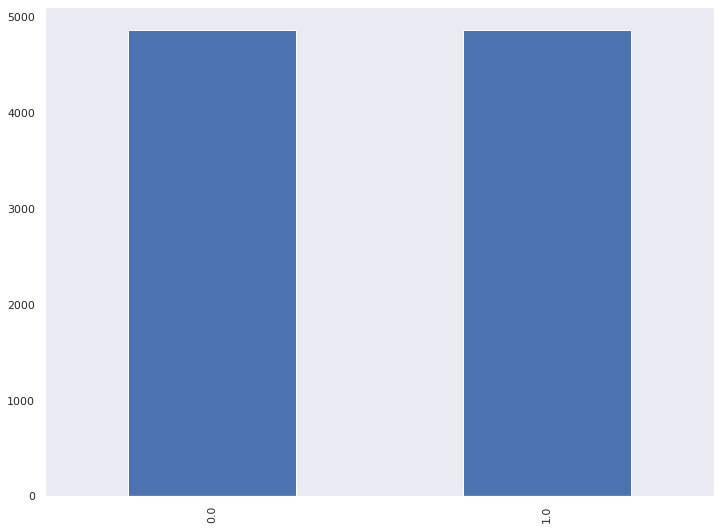

In [ ]:
print(y_over.value_counts())
y_over.value_counts().sort_index().plot.bar()

# Base Model - 1

## LOGISTIC REGRESSION

In [ ]:
X = df1.iloc[:,df1.columns != 'stroke']
y = df1.stroke

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_test

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3448,32563.0,55.0,0.0,0.0,92.59,36.600000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3760,59663.0,28.0,0.0,0.0,107.74,38.500000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4614,56425.0,78.0,0.0,0.0,61.38,24.300000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1613,49789.0,73.0,0.0,0.0,62.99,25.400000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1010,84.0,55.0,0.0,0.0,89.17,31.500000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,49270.0,81.0,0.0,0.0,77.54,33.800000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2322,57903.0,52.0,1.0,0.0,111.38,28.893237,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4317,69528.0,31.0,0.0,0.0,56.48,26.200000,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1993,27163.0,60.0,1.0,0.0,109.00,28.893237,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
LogisReg_model = LogisticRegression()
LogisReg_model.fit(X_train,y_train)
Log_y_preds = LogisReg_model.predict(X_test)
Log_preds = pd.DataFrame({"Predicted":Log_y_preds,"Actual":y_test})
Log_preds

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predicted,Actual
3448,0.0,0.0
3760,0.0,0.0
4614,0.0,0.0
1613,0.0,0.0
1010,0.0,0.0
...,...,...
3222,0.0,0.0
2322,0.0,0.0
4317,0.0,0.0
1993,0.0,0.0


In [ ]:
Log_TP = len(Log_preds[(Log_preds["Predicted"]==Log_preds["Actual"])&(Log_preds["Predicted"]==1)])
Log_FP = len(Log_preds[(Log_preds["Predicted"]!=Log_preds["Actual"])&(Log_preds["Predicted"]==1)])
Log_FN = len(Log_preds[(Log_preds["Predicted"]!=Log_preds["Actual"])&(Log_preds["Predicted"]==0)])
Log_TN = len(Log_preds[(Log_preds["Predicted"]==Log_preds["Actual"])&(Log_preds["Predicted"]==0)])
print(Log_TP,Log_FP,Log_FN,Log_TN)
print("Rightly Classified: ",(Log_TP+Log_TN),"/",(Log_TP+Log_FP+Log_FN+Log_TN))
print("Wrongly Classified: ",(Log_FP+Log_FN),"/",(Log_TP+Log_FP+Log_FN+Log_TN))

Log_Accuracy = (Log_TP+Log_TN)/(Log_TP+Log_TN+Log_FP+Log_FN)
Log_Precision = (Log_TP)/(Log_TP+Log_FP)
Log_Recall = (Log_TP)/(Log_TP+Log_FN)
Log_Specificity = (Log_TN)/(Log_TN+Log_FP)
Log_F1 = (2*Log_Precision*Log_Recall)/(Log_Precision+Log_Recall)

1 7 41 973
Rightly Classified:  974 / 1022
Wrongly Classified:  48 / 1022


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
LogisticRegression()
train_acc = model.score(X_train_scaled, y_train)

In [ ]:
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 94.90695396669932


In [ ]:
y_pred = model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 95.69471624266144


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       980
         1.0       0.25      0.02      0.04        42

    accuracy                           0.96      1022
   macro avg       0.60      0.51      0.51      1022
weighted avg       0.93      0.96      0.94      1022



Text(0.5, 30.5, 'Predicted Values')

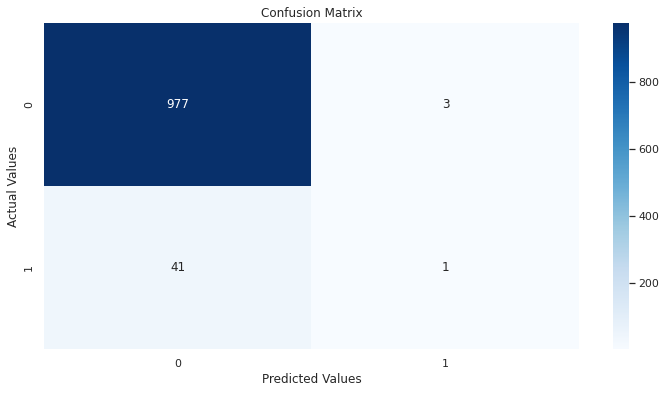

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [ ]:
# plot_confusion_matrix(model, X_test, y_test)

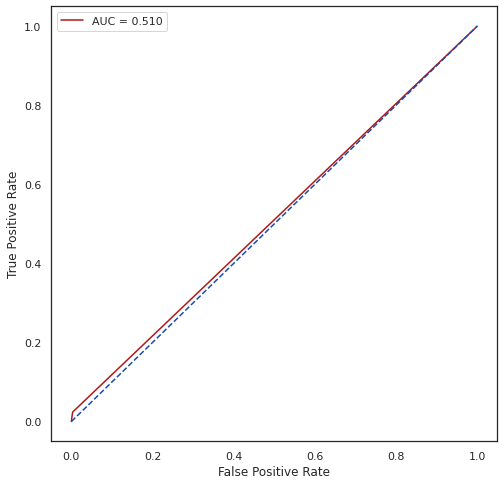

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# METRICS

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
print(Precision)

0.25


In [ ]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(Sensitivity_recall)

0.023809523809523808


In [ ]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print(Specificity)

0.996938775510204


In [ ]:
F1_score = metrics.f1_score(y_test, y_pred)
print(F1_score)

0.04347826086956521


## ACCURACY

In [ ]:
acc_lr = accuracy_score(y_test, y_pred)
print ("Accuracy : ", acc_lr)

Accuracy :  0.9569471624266145


# BASE MODEL - 2

## DECISION TREE

In [ ]:
df3 = df1.drop(['id'], axis=1)

In [ ]:
df3.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [ ]:
column = df3.columns

In [ ]:
X = df3.iloc[:,df3.columns != 'stroke']
y = df3.stroke

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

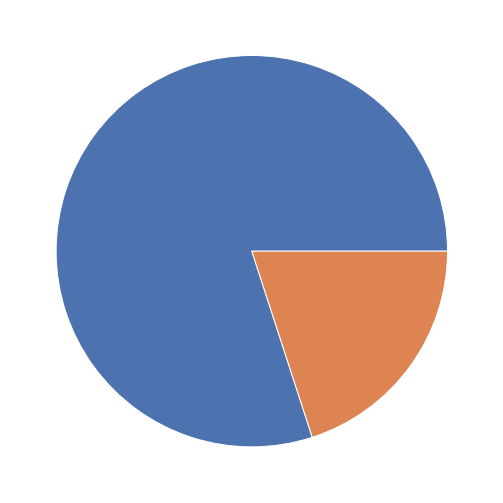

In [ ]:
Split=np.array([80,20])
plt.pie(Split)
plt.show()

In [ ]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
DecisionTree_model = tree.DecisionTreeClassifier(criterion="entropy")
DecisionTree_model.fit(X_train,y_train)
y_preds = DecisionTree_model.predict(X_test)
Decision_tree_preds = pd.DataFrame({"Predicted":y_preds,"Actual":y_test})
Decision_tree_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
Decision_TP = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]==Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==1)])
Decision_FP = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]!=Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==1)])
Decision_FN = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]!=Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==0)])
Decision_TN = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]==Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==0)])
print(Decision_TP,Decision_FP,Decision_FN,Decision_TN)
print("Rightly Classified: ",(Decision_TP+Decision_TN),"/",(Decision_TP+Decision_FP+Decision_FN+Decision_TN))
print("Wrongly Classified: ",(Decision_FP+Decision_FN),"/",(Decision_TP+Decision_FP+Decision_FN+Decision_TN))

Decision_Accuracy = (Decision_TP+Decision_TN)/(Decision_TP+Decision_TN+Decision_FP+Decision_FN)
Decision_Precision = (Decision_TP)/(Decision_TP+Decision_FP)
Decision_Recall = (Decision_TP)/(Decision_TP+Decision_FN)
Decision_Specificity = (Decision_TN)/(Decision_TN+Decision_FP)
Decision_F1 = (2*Decision_Precision*Decision_Recall)/(Decision_Precision+Decision_Recall)

7 54 47 914
Rightly Classified:  921 / 1022
Wrongly Classified:  101 / 1022


CONFUSION MATRIX

In [ ]:
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[923  45]
 [ 47   7]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


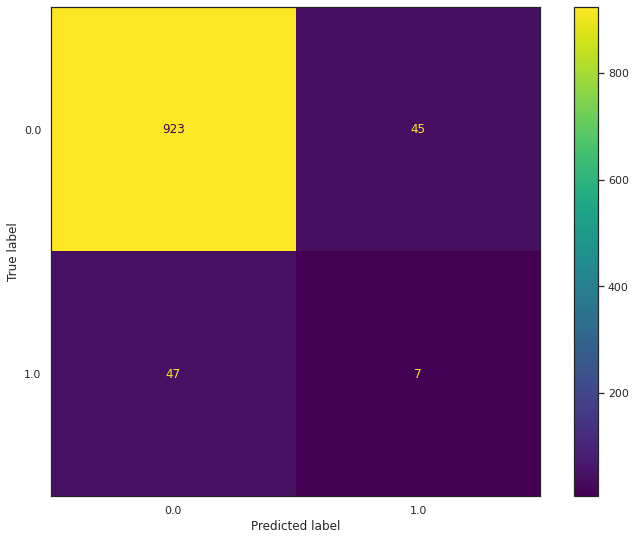

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test)

ACCURACY

In [ ]:
acc_dt=accuracy_score(y_test, y_pred)
print('Accuracy of the model:',acc_dt)

Accuracy of the model: 0.9099804305283757


PREDICTED VALUES

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
42,1.0,0.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,1.0,0.0
4646,0.0,0.0


[Text(0.39234484777517564, 0.9772727272727273, 'age <= 56.5\nentropy = 0.275\nsamples = 4084\nvalue = [3891, 193]\nclass = 0'),
 Text(0.0469847775175644, 0.9318181818181818, 'age <= 37.5\nentropy = 0.088\nsamples = 2799\nvalue = [2768, 31]\nclass = 0'),
 Text(0.00936768149882904, 0.8863636363636364, 'age <= 31.5\nentropy = 0.007\nsamples = 1638\nvalue = [1637, 1]\nclass = 0'),
 Text(0.00468384074941452, 0.8409090909090909, 'entropy = 0.0\nsamples = 1324\nvalue = [1324, 0]\nclass = 0'),
 Text(0.01405152224824356, 0.8409090909090909, 'age <= 32.5\nentropy = 0.031\nsamples = 314\nvalue = [313, 1]\nclass = 0'),
 Text(0.00936768149882904, 0.7954545454545454, 'Residence_type_Urban <= 0.5\nentropy = 0.127\nsamples = 57\nvalue = [56, 1]\nclass = 0'),
 Text(0.00468384074941452, 0.75, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = 0'),
 Text(0.01405152224824356, 0.75, 'avg_glucose_level <= 76.9\nentropy = 0.323\nsamples = 17\nvalue = [16, 1]\nclass = 0'),
 Text(0.00936768149882904, 0.704

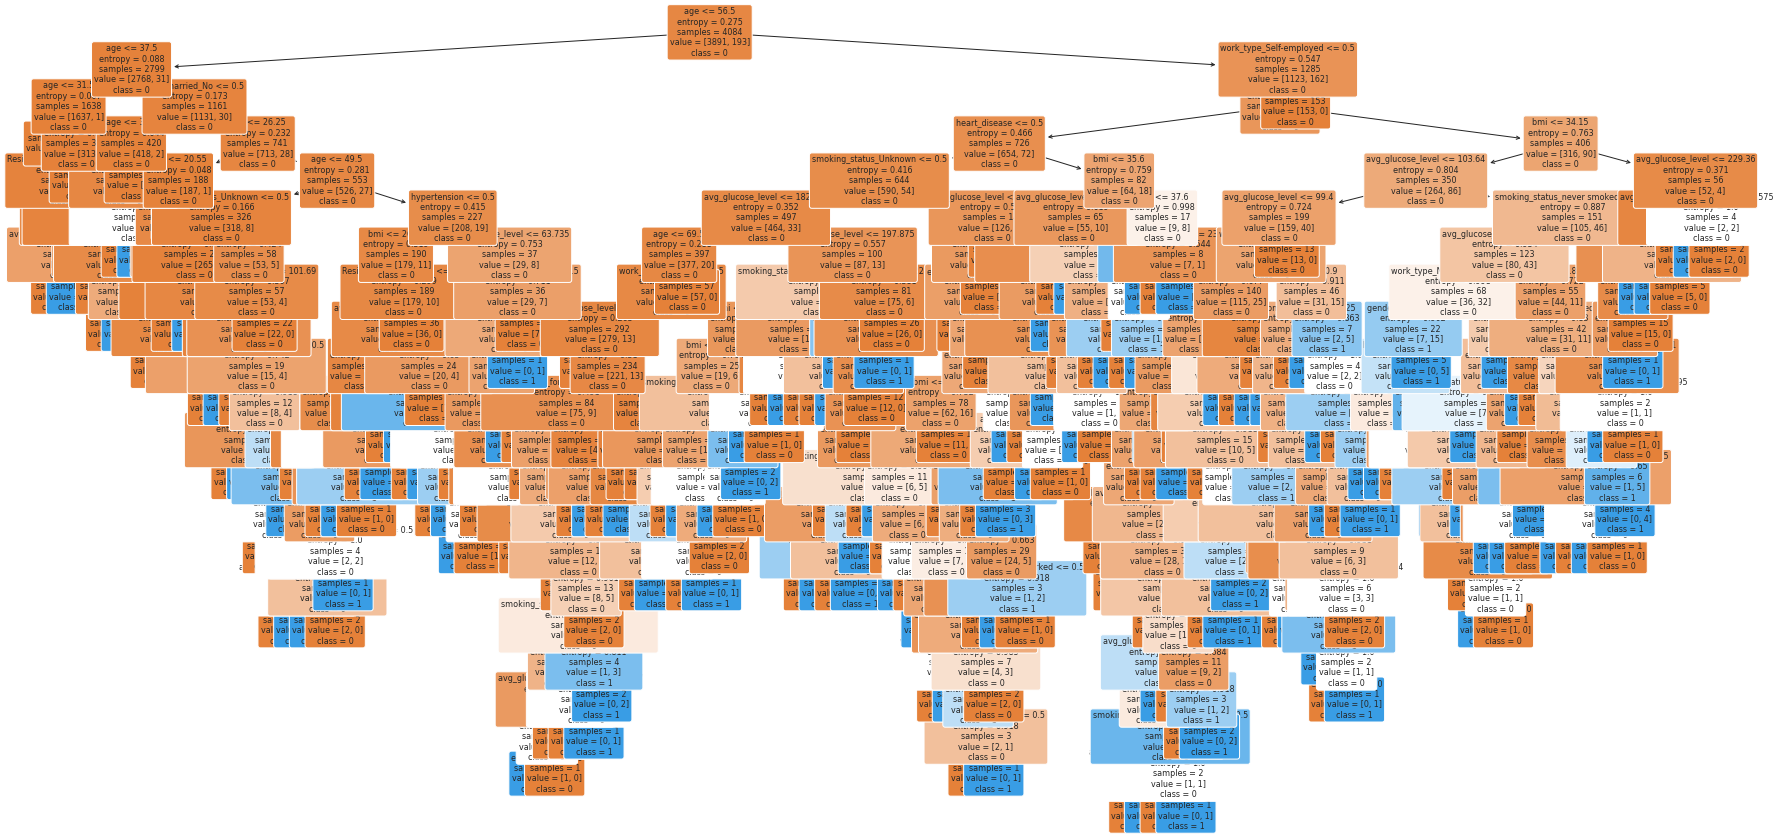

In [ ]:
plt.figure(figsize=(30,15))
tree.plot_tree(classifier,class_names=['0','1'],feature_names=column, filled=True,rounded=True,fontsize=8)

PREDICTING FOR NEW RANDOM VALUES

In [ ]:
Status=classifier.predict([[30,	1, 0, 86.6, 36.3, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]])
if Status==0:
  print('No Stroke')
else:
  print('Got Stroke')

No Stroke


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# LGBM (Light Gradient Boosting Machine) Classifier

In [ ]:
from lightgbm import *

LGBM_model = LGBMClassifier()
LGBM_model.fit(X_train, y_train)
LGBM_y_preds = LGBM_model.predict(X_test)
LGBM_preds = pd.DataFrame({"Predicted":LGBM_y_preds,"Actual":y_test})
LGBM_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
LGBM_TP = len(LGBM_preds[(LGBM_preds["Predicted"]==LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==1)])
LGBM_FP = len(LGBM_preds[(LGBM_preds["Predicted"]!=LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==1)])
LGBM_FN = len(LGBM_preds[(LGBM_preds["Predicted"]!=LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==0)])
LGBM_TN = len(LGBM_preds[(LGBM_preds["Predicted"]==LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==0)])
print(LGBM_TP,LGBM_FP,LGBM_FN,LGBM_TN)
print("Rightly Classified: ",(LGBM_TP+LGBM_TN),"/",(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN))
print("Wrongly Classified: ",(LGBM_FP+LGBM_FN),"/",(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN))

LGBM_Accuracy = (LGBM_TP+LGBM_TN)/(LGBM_TP+LGBM_TN+LGBM_FP+LGBM_FN)
LGBM_Precision = (LGBM_TP)/(LGBM_TP+LGBM_FP)
LGBM_Recall = (LGBM_TP)/(LGBM_TP+LGBM_FN)
LGBM_Specificity = (LGBM_TN)/(LGBM_TN+LGBM_FP)
LGBM_F1 = (2*LGBM_Precision*LGBM_Recall)/(LGBM_Precision+LGBM_Recall)

4 5 50 963
Rightly Classified:  967 / 1022
Wrongly Classified:  55 / 1022


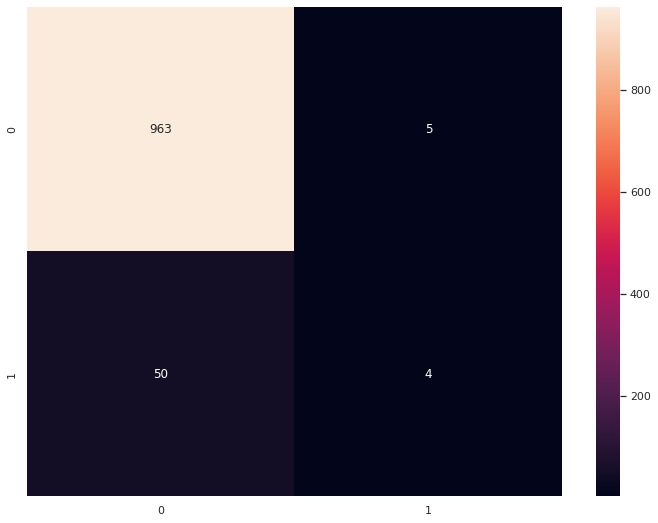

In [ ]:
LGBM_Confusion_matrix = confusion_matrix(y_test, LGBM_y_preds)
sns.heatmap(LGBM_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, LGBM_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       968
         1.0       0.44      0.07      0.13        54

    accuracy                           0.95      1022
   macro avg       0.70      0.53      0.55      1022
weighted avg       0.92      0.95      0.93      1022



# CatBoost Classifier (300 and 1000 iterations)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

CatBoost_model = CatBoostClassifier()
CatBoost_model.fit(X_train, y_train)
CatBoost_y_preds = CatBoost_model.predict(X_test)
CatBoost_preds = pd.DataFrame({"Predicted":CatBoost_y_preds,"Actual":y_test})
CatBoost_preds

Learning rate set to 0.018787
0:	learn: 0.6603011	total: 50.6ms	remaining: 50.6s
1:	learn: 0.6281853	total: 52.7ms	remaining: 26.3s
2:	learn: 0.6035521	total: 54.7ms	remaining: 18.2s
3:	learn: 0.5777677	total: 57ms	remaining: 14.2s
4:	learn: 0.5553177	total: 59.7ms	remaining: 11.9s
5:	learn: 0.5347505	total: 62.5ms	remaining: 10.3s
6:	learn: 0.5106868	total: 66ms	remaining: 9.36s
7:	learn: 0.4897161	total: 72.5ms	remaining: 8.98s
8:	learn: 0.4736218	total: 78.5ms	remaining: 8.64s
9:	learn: 0.4586903	total: 84.7ms	remaining: 8.38s
10:	learn: 0.4393174	total: 92.1ms	remaining: 8.28s
11:	learn: 0.4258259	total: 97.9ms	remaining: 8.06s
12:	learn: 0.4128680	total: 101ms	remaining: 7.65s
13:	learn: 0.3988277	total: 104ms	remaining: 7.3s
14:	learn: 0.3866127	total: 106ms	remaining: 6.99s
15:	learn: 0.3730059	total: 109ms	remaining: 6.71s
16:	learn: 0.3628257	total: 112ms	remaining: 6.46s
17:	learn: 0.3496364	total: 114ms	remaining: 6.24s
18:	learn: 0.3401539	total: 117ms	remaining: 6.05s
19:	

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
CatBoost_model2 = CatBoostClassifier(iterations=300,silent=True)
CatBoost_model2.fit(X_train, y_train)
CatBoost_y_preds2 = CatBoost_model2.predict(X_test)
CatBoost_preds2 = pd.DataFrame({"Predicted":CatBoost_y_preds2,"Actual":y_test})
CatBoost_preds2

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
#1000 iterations
CatBoost_TP = len(CatBoost_preds[(CatBoost_preds["Predicted"]==CatBoost_preds["Actual"])&(CatBoost_preds["Predicted"]==1)])
CatBoost_FP = len(CatBoost_preds[(CatBoost_preds["Predicted"]!=CatBoost_preds["Actual"])&(CatBoost_preds["Predicted"]==1)])
CatBoost_FN = len(CatBoost_preds[(CatBoost_preds["Predicted"]!=CatBoost_preds["Actual"])&(CatBoost_preds["Predicted"]==0)])
CatBoost_TN = len(CatBoost_preds[(CatBoost_preds["Predicted"]==CatBoost_preds["Actual"])&(CatBoost_preds["Predicted"]==0)])
print(CatBoost_TP,CatBoost_FP,CatBoost_FN,CatBoost_TN)
print("Rightly Classified: ",(CatBoost_TP+CatBoost_TN),"/",(CatBoost_TP+CatBoost_FP+CatBoost_FN+CatBoost_TN))
print("Wrongly Classified: ",(CatBoost_FP+CatBoost_FN),"/",(CatBoost_TP+CatBoost_FP+CatBoost_FN+CatBoost_TN))

CatBoost_Accuracy = (CatBoost_TP+CatBoost_TN)/(CatBoost_TP+CatBoost_TN+CatBoost_FP+CatBoost_FN)
CatBoost_Precision = (CatBoost_TP)/(CatBoost_TP+CatBoost_FP)
CatBoost_Recall = (CatBoost_TP)/(CatBoost_TP+CatBoost_FN)
CatBoost_Specificity = (CatBoost_TN)/(CatBoost_TN+CatBoost_FP)
CatBoost_F1 = (2*CatBoost_Precision*CatBoost_Recall)/(CatBoost_Precision+CatBoost_Recall)

2 5 52 963
Rightly Classified:  965 / 1022
Wrongly Classified:  57 / 1022


In [ ]:
#300 iterations












CatBoost_TP2 = len(CatBoost_preds2[(CatBoost_preds2["Predicted"]==CatBoost_preds2["Actual"])&(CatBoost_preds2["Predicted"]==1)])
CatBoost_FP2 = len(CatBoost_preds2[(CatBoost_preds2["Predicted"]!=CatBoost_preds2["Actual"])&(CatBoost_preds2["Predicted"]==1)])
CatBoost_FN2 = len(CatBoost_preds2[(CatBoost_preds2["Predicted"]!=CatBoost_preds2["Actual"])&(CatBoost_preds2["Predicted"]==0)])
CatBoost_TN2 = len(CatBoost_preds2[(CatBoost_preds2["Predicted"]==CatBoost_preds2["Actual"])&(CatBoost_preds2["Predicted"]==0)])
print(CatBoost_TP2,CatBoost_FP2,CatBoost_FN2,CatBoost_TN2)
print("Rightly Classified: ",(CatBoost_TP2+CatBoost_TN2),"/",(CatBoost_TP2+CatBoost_FP2+CatBoost_FN2+CatBoost_TN2))
print("Wrongly Classified: ",(CatBoost_FP2+CatBoost_FN2),"/",(CatBoost_TP2+CatBoost_FP2+CatBoost_FN2+CatBoost_TN2))

CatBoost_Accuracy2 = (CatBoost_TP2+CatBoost_TN2)/(CatBoost_TP2+CatBoost_TN2+CatBoost_FP2+CatBoost_FN2)
CatBoost_Precision2 = (CatBoost_TP2)/(CatBoost_TP2+CatBoost_FP2)
CatBoost_Recall2 = (CatBoost_TP2)/(CatBoost_TP2+CatBoost_FN2)
CatBoost_Specificity2 = (CatBoost_TN2)/(CatBoost_TN2+CatBoost_FP2)
CatBoost_F12 = (2*CatBoost_Precision2*CatBoost_Recall2)/(CatBoost_Precision2+CatBoost_Recall2)

2 3 52 965
Rightly Classified:  967 / 1022
Wrongly Classified:  55 / 1022


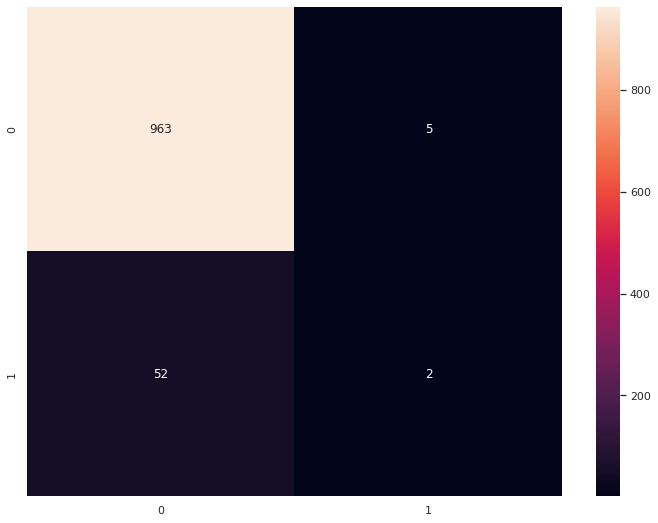

In [ ]:
#1000 Iterations
CatBoost_Confusion_matrix = confusion_matrix(y_test, CatBoost_y_preds)
sns.heatmap(CatBoost_Confusion_matrix, annot=True, fmt='g')

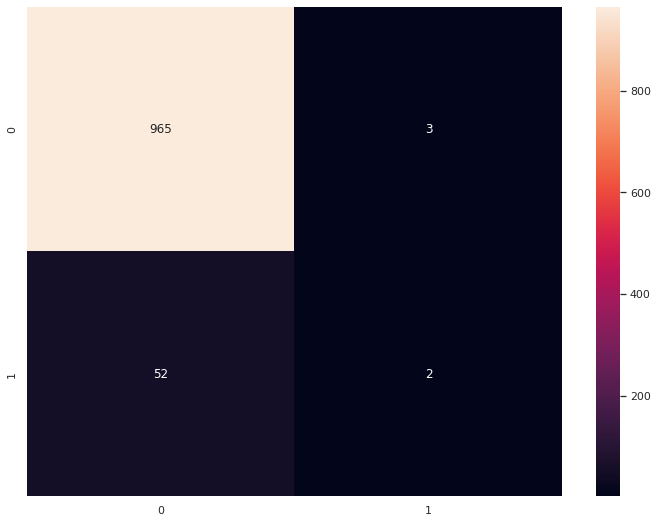

In [ ]:
#300 Iterations
CatBoost_Confusion_matrix2 = confusion_matrix(y_test, CatBoost_y_preds2)
sns.heatmap(CatBoost_Confusion_matrix2, annot=True, fmt='g')

In [ ]:
#1000 Iterations
print(classification_report(y_test, CatBoost_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       968
         1.0       0.29      0.04      0.07        54

    accuracy                           0.94      1022
   macro avg       0.62      0.52      0.52      1022
weighted avg       0.91      0.94      0.92      1022



In [ ]:
#300 Iterations
print(classification_report(y_test, CatBoost_y_preds2))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.40      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.67      0.52      0.52      1022
weighted avg       0.92      0.95      0.92      1022



# XGBoosting

In [ ]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)
XGB_y_preds =XGB_model.predict(X_test)
XGB_preds = pd.DataFrame({"Predicted":XGB_y_preds,"Actual":y_test})
XGB_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
XGB_TP = len(XGB_preds[(XGB_preds["Predicted"]==XGB_preds["Actual"])&(XGB_preds["Predicted"]==1)])
XGB_FP = len(XGB_preds[(XGB_preds["Predicted"]!=XGB_preds["Actual"])&(XGB_preds["Predicted"]==1)])
XGB_FN = len(XGB_preds[(XGB_preds["Predicted"]!=XGB_preds["Actual"])&(XGB_preds["Predicted"]==0)])
XGB_TN = len(XGB_preds[(XGB_preds["Predicted"]==XGB_preds["Actual"])&(XGB_preds["Predicted"]==0)])
print(XGB_TP,XGB_FP,XGB_FN,XGB_TN)
print("Rightly Classified: ",(XGB_TP+XGB_TN),"/",(XGB_TP+XGB_FP+XGB_FN+XGB_TN))
print("Wrongly Classified: ",(XGB_FP+XGB_FN),"/",(XGB_TP+XGB_FP+XGB_FN+XGB_TN))

XGB_Accuracy = (XGB_TP+XGB_TN)/(XGB_TP+XGB_TN+XGB_FP+XGB_FN)
# XGB_Precision = (XGB_TP)/(XGB_TP+XGB_FP)
XGB_Recall = (XGB_TP)/(XGB_TP+XGB_FN)
XGB_Specificity = (XGB_TN)/(XGB_TN+XGB_FP)
# XGB_F1 = (2*XGB_Precision*XGB_Recall)/(XGB_Precision+XGB_Recall)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


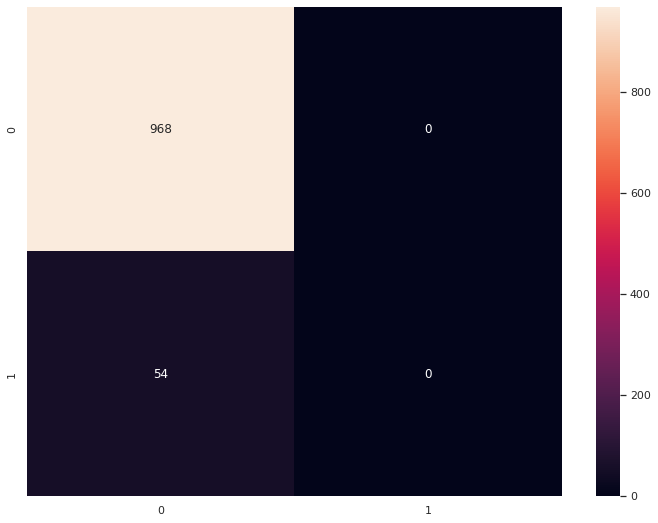

In [ ]:
XGB_Confusion_matrix = confusion_matrix(y_test, XGB_y_preds)
sns.heatmap(XGB_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, XGB_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest (Max 2 features in Bootstraping)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model1 = RandomForestClassifier(max_features=2)
RF_model1.fit(X_train,y_train)
RF_y_preds = RF_model1.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":y_test})
RF_preds

,Predicted,Actual
42,1.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
import math

RF_TP1 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP1 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN1 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN1 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP1,RF_FP1,RF_FN1,RF_TN1)
print("Rightly Classified: ",(RF_TP1+RF_TN1),"/",(RF_TP1+RF_FP1+RF_FN1+RF_TN1))
print("Wrongly Classified: ",(RF_FP1+RF_FN1),"/",(RF_TP1+RF_FP1+RF_FN1+RF_TN1))

RF_Accuracy1 = (RF_TP1+RF_TN1)/(RF_TP1+RF_FP1+RF_FN1+RF_TN1)
RF_Precision1 = (RF_TP1)/(RF_TP1+RF_FP1)
RF_Recall1 = (RF_TP1)/(RF_TP1+RF_FN1)
RF_Specificity1 = (RF_TN1)/(RF_TN1+RF_FP1)
RF_F11 = (2*RF_Precision1*RF_Recall1)/(RF_Precision1+RF_Recall1)

2 3 52 965
Rightly Classified:  967 / 1022
Wrongly Classified:  55 / 1022


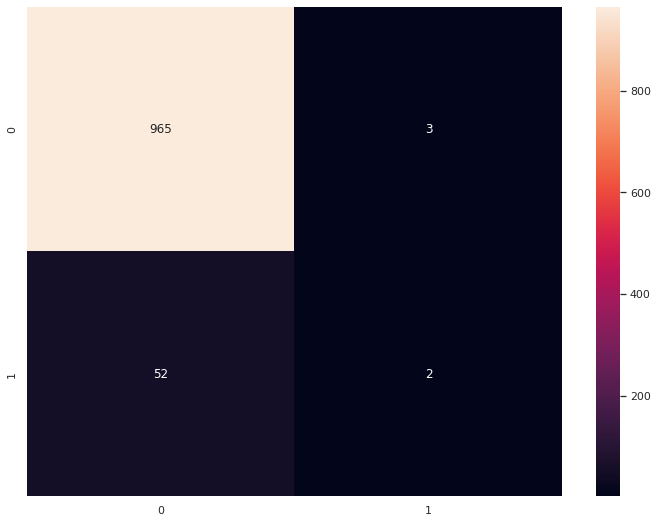

In [ ]:
RF_Confusion_matrix = confusion_matrix(y_test, RF_y_preds)
sns.heatmap(RF_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.40      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.67      0.52      0.52      1022
weighted avg       0.92      0.95      0.92      1022



# Random Forest (Max 5 features in Bootstraping)

In [ ]:
RF_model2 = RandomForestClassifier(max_features=5)
RF_model2.fit(X_train,y_train)
RF_y_preds = RF_model2.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":y_test})
RF_preds

,Predicted,Actual
42,1.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
import math

RF_TP2 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP2 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN2 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN2 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP2,RF_FP2,RF_FN2,RF_TN2)
print("Rightly Classified: ",(RF_TP2+RF_TN2),"/",(RF_TP2+RF_FP2+RF_FN2+RF_TN2))
print("Wrongly Classified: ",(RF_FP2+RF_FN2),"/",(RF_TP2+RF_FP2+RF_FN2+RF_TN2))

RF_Accuracy2 = (RF_TP2+RF_TN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2)
RF_Precision2 = (RF_TP2)/(RF_TP2+RF_FP2)
RF_Recall2 = (RF_TP2)/(RF_TP2+RF_FN2)
RF_Specificity2 = (RF_TN2)/(RF_TN2+RF_FP2)
RF_F12 = (2*RF_Precision2*RF_Recall2)/(RF_Precision2+RF_Recall2)

2 4 52 964
Rightly Classified:  966 / 1022
Wrongly Classified:  56 / 1022


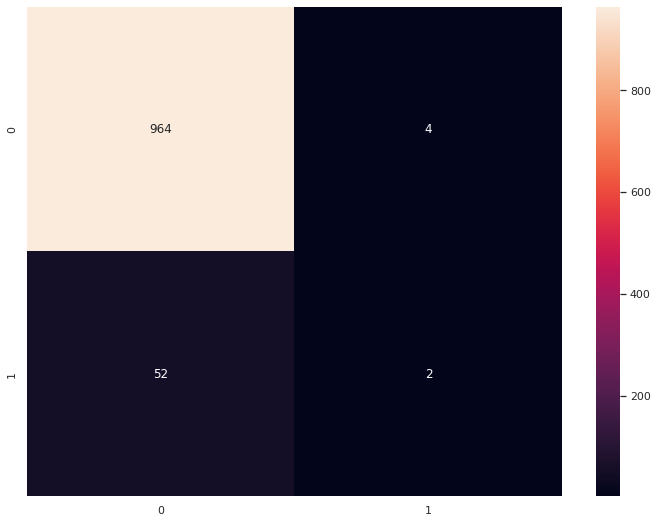

In [ ]:
RF_Confusion_matrix = confusion_matrix(y_test, RF_y_preds)
sns.heatmap(RF_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.33      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.64      0.52      0.52      1022
weighted avg       0.92      0.95      0.92      1022



# Random Forest (Max 10 features in Bootstraping)

In [ ]:
RF_model3 = RandomForestClassifier(max_features=10)
RF_model3.fit(X_train,y_train)
RF_y_preds = RF_model3.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":y_test})
RF_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
RF_TP3 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP3 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN3 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN3 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP3,RF_FP3,RF_FN3,RF_TN3)
print("Rightly Classified: ",(RF_TP3+RF_TN3),"/",(RF_TP3+RF_FP3+RF_FN3+RF_TN3))
print("Wrongly Classified: ",(RF_FP3+RF_FN3),"/",(RF_TP3+RF_FP3+RF_FN3+RF_TN3))

RF_Accuracy3 = (RF_TP3+RF_TN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3)
RF_Precision3 = (RF_TP3)/(RF_TP3+RF_FP3)
RF_Recall3 = (RF_TP3)/(RF_TP3+RF_FN3)
RF_Specificity3 = (RF_TN3)/(RF_TN3+RF_FP3)
RF_F13 = (2*RF_Precision3*RF_Recall3)/(RF_Precision3+RF_Recall3)

1 4 53 964
Rightly Classified:  965 / 1022
Wrongly Classified:  57 / 1022


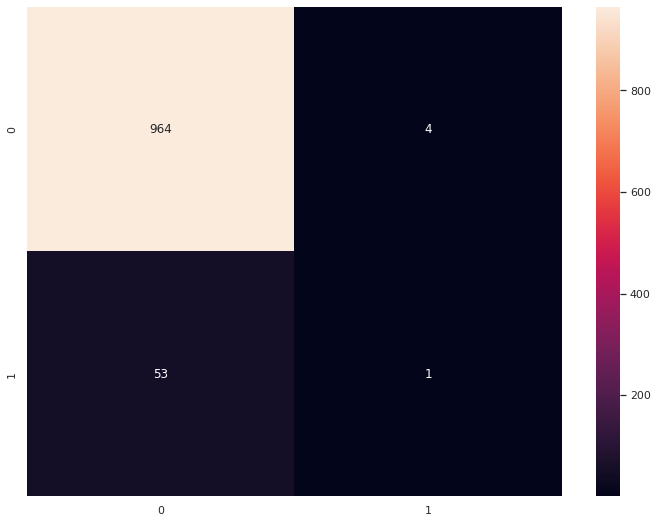

In [ ]:
RF_Confusion_matrix = confusion_matrix(y_test, RF_y_preds)
sns.heatmap(RF_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.20      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.91      0.94      0.92      1022



# Random Forest (Max 18 features in Bootstraping)

In [ ]:
RF_model4 = RandomForestClassifier(max_features=18)
RF_model4.fit(X_train,y_train)
RF_y_preds = RF_model4.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":y_test})
RF_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
RF_TP4 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP4 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN4 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN4 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP4,RF_FP4,RF_FN4,RF_TN4)
print("Rightly Classified: ",(RF_TP4+RF_TN4),"/",(RF_TP4+RF_FP4+RF_FN4+RF_TN4))
print("Wrongly Classified: ",(RF_FP4+RF_FN4),"/",(RF_TP4+RF_FP4+RF_FN4+RF_TN4))

RF_Accuracy4 = (RF_TP4+RF_TN4)/(RF_TP4+RF_FP4+RF_FN4+RF_TN4)
RF_Precision4 = (RF_TP4)/(RF_TP4+RF_FP4)
RF_Recall4 = (RF_TP4)/(RF_TP4+RF_FN4)
RF_Specificity4 = (RF_TN4)/(RF_TN4+RF_FP4)
# RF_F14 = (2*RF_Precision4*RF_Recall4)/(RF_Precision4+RF_Recall4)

0 2 54 966
Rightly Classified:  966 / 1022
Wrongly Classified:  56 / 1022


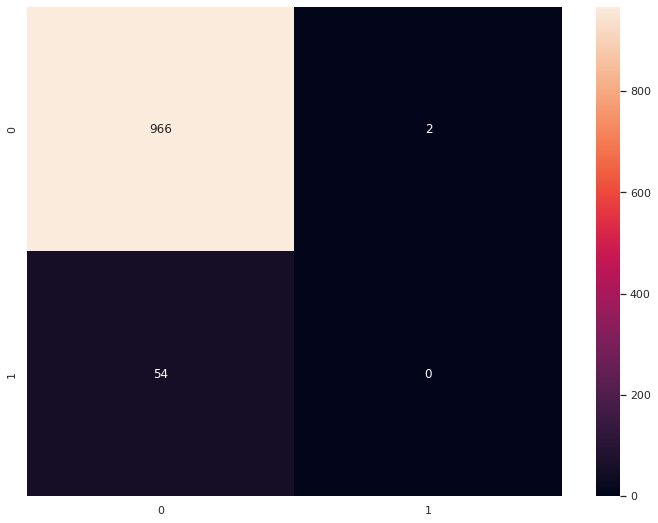

In [ ]:
RF_Confusion_matrix = confusion_matrix(y_test, RF_y_preds)
sns.heatmap(RF_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(X_train,y_train)
GNB_y_preds = GNB_model.predict(X_test)
GNB_preds = pd.DataFrame({"Predicted":GNB_y_preds,"Actual":y_test})
GNB_preds

,Predicted,Actual
42,1.0,1.0
3777,0.0,0.0
3792,1.0,0.0
3957,1.0,0.0
4626,1.0,0.0
...,...,...
3272,1.0,0.0
4201,0.0,0.0
248,1.0,1.0
4646,1.0,0.0


In [ ]:
GNB_TP = len(GNB_preds[(GNB_preds["Predicted"]==GNB_preds["Actual"])&(GNB_preds["Predicted"]==1)])
GNB_FP = len(GNB_preds[(GNB_preds["Predicted"]!=GNB_preds["Actual"])&(GNB_preds["Predicted"]==1)])
GNB_FN = len(GNB_preds[(GNB_preds["Predicted"]!=GNB_preds["Actual"])&(GNB_preds["Predicted"]==0)])
GNB_TN = len(GNB_preds[(GNB_preds["Predicted"]==GNB_preds["Actual"])&(GNB_preds["Predicted"]==0)])
print(GNB_TP,GNB_FP,GNB_FN,GNB_TN)
print("Rightly Classified: ",(GNB_TP+GNB_TN),"/",(GNB_TP+GNB_FP+GNB_FN+GNB_TN))
print("Wrongly Classified: ",(GNB_FP+GNB_FN),"/",(GNB_TP+GNB_FP+GNB_FN+GNB_TN))

GNB_Accuracy = (GNB_TP+GNB_TN)/(GNB_TP+GNB_FP+GNB_FN+GNB_TN)
GNB_Precision = (GNB_TP)/(GNB_TP+GNB_FP)
GNB_Recall = (GNB_TP)/(GNB_TP+GNB_FN)
GNB_Specificity = (GNB_TN)/(GNB_TN+GNB_FP)
GNB_F1 = (2*GNB_Precision*GNB_Recall)/(GNB_Precision+GNB_Recall)

53 637 1 331
Rightly Classified:  384 / 1022
Wrongly Classified:  638 / 1022


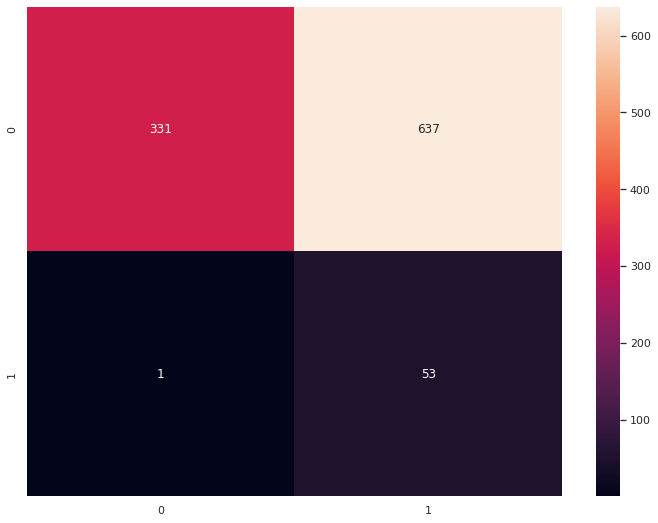

In [ ]:
GNB_Confusion_matrix = confusion_matrix(y_test, GNB_y_preds)
sns.heatmap(GNB_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, GNB_y_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.34      0.51       968
         1.0       0.08      0.98      0.14        54

    accuracy                           0.38      1022
   macro avg       0.54      0.66      0.33      1022
weighted avg       0.95      0.38      0.49      1022



# KNN (k=10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model1 = KNeighborsClassifier(n_neighbors=10)
KNN_model1.fit(X_train,y_train)
KNN_y_preds = KNN_model1.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
KNN_TP1 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP1 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN1 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN1 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP1,KNN_FP1,KNN_FN1,KNN_TN1)
print("Rightly Classified: ",(KNN_TP1+KNN_TN1),"/",(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1))
print("Wrongly Classified: ",(KNN_FP1+KNN_FN1),"/",(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1))

KNN_Accuracy1 = (KNN_TP1+KNN_TN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1)
# KNN_Precision1 = (KNN_TP1)/(KNN_TP1+KNN_FP1)
KNN_Recall1 = (KNN_TP1)/(KNN_TP1+KNN_FN1)
KNN_Specificity1 = (KNN_TN1)/(KNN_TN1+KNN_FP1)
# KNN_F11 = (2*KNN_Precision1*KNN_Recall1)/(KNN_Precision1+KNN_Recall1)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


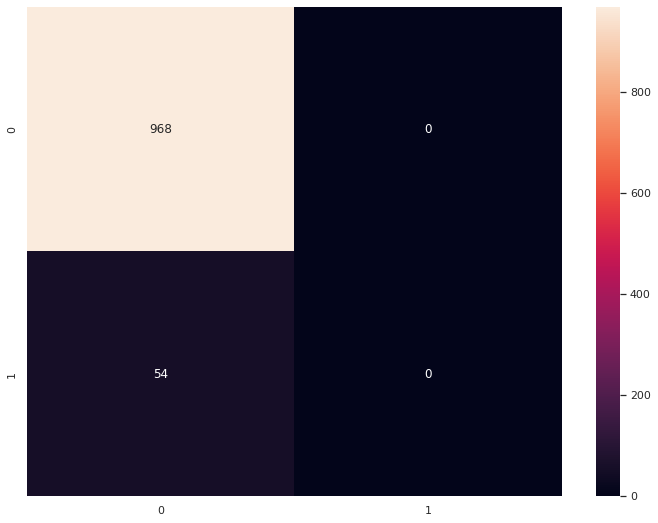

In [ ]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN (k=50)

In [ ]:
KNN_model2 = KNeighborsClassifier(n_neighbors=50)
KNN_model2.fit(X_train,y_train)
KNN_y_preds = KNN_model2.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
KNN_TP2 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP2 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN2 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN2 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP2,KNN_FP2,KNN_FN2,KNN_TN2)
print("Rightly Classified: ",(KNN_TP2+KNN_TN2),"/",(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2))
print("Wrongly Classified: ",(KNN_FP2+KNN_FN2),"/",(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2))

KNN_Accuracy2 = (KNN_TP2+KNN_TN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2)
# KNN_Precision2 = (KNN_TP2)/(KNN_TP2+KNN_FP2)
KNN_Recall2 = (KNN_TP2)/(KNN_TP2+KNN_FN2)
KNN_Specificity2 = (KNN_TN2)/(KNN_TN2+KNN_FP2)
# KNN_F12 = (2*KNN_Precision2*KNN_Recall2)/(KNN_Precision2+KNN_Recall2)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


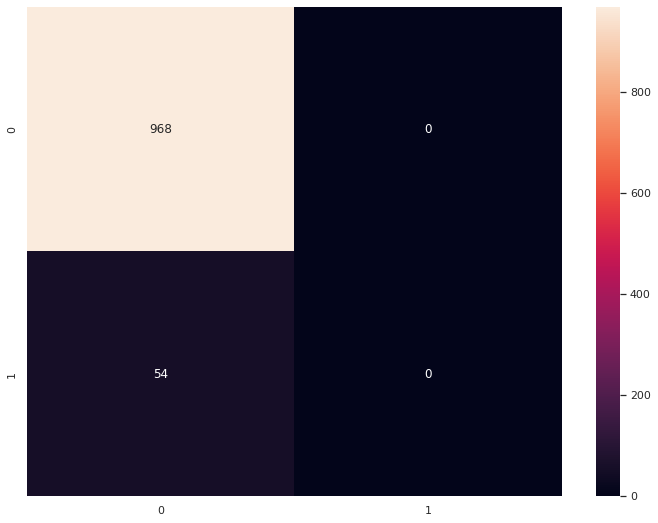

In [ ]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN (k=200)

In [ ]:
KNN_model3 = KNeighborsClassifier(n_neighbors=200)
KNN_model3.fit(X_train,y_train)
KNN_y_preds = KNN_model3.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
KNN_TP3 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP3 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN3 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN3 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP3,KNN_FP3,KNN_FN3,KNN_TN3)
print("Rightly Classified: ",(KNN_TP3+KNN_TN3),"/",(KNN_TP3+KNN_FP3+KNN_FN3+KNN_TN3))
print("Wrongly Classified: ",(KNN_FP3+KNN_FN3),"/",(KNN_TP3+KNN_FP3+KNN_FN3+KNN_TN3))

KNN_Accuracy3 = (KNN_TP3+KNN_TN3)/(KNN_TP3+KNN_FP3+KNN_FN3+KNN_TN3)
# KNN_Precision3 = (KNN_TP3)/(KNN_TP3+KNN_FP3)
KNN_Recall3 = (KNN_TP3)/(KNN_TP3+KNN_FN3)
KNN_Specificity3 = (KNN_TN3)/(KNN_TN3+KNN_FP3)
# KNN_F13 = (2*KNN_Precision3*KNN_Recall3)/(KNN_Precision3+KNN_Recall3)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


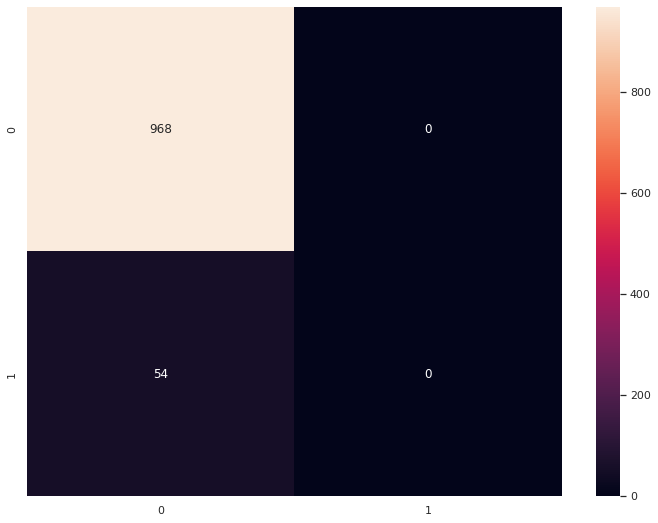

In [ ]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN (k=500)

In [ ]:
KNN_model4 = KNeighborsClassifier(n_neighbors=500)
KNN_model4.fit(X_train,y_train)
KNN_y_preds = KNN_model4.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
KNN_TP4 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP4 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN4 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN4 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP4,KNN_FP4,KNN_FN4,KNN_TN4)
print("Rightly Classified: ",(KNN_TP4+KNN_TN4),"/",(KNN_TP4+KNN_FP4+KNN_FN4+KNN_TN4))
print("Wrongly Classified: ",(KNN_FP4+KNN_FN4),"/",(KNN_TP4+KNN_FP4+KNN_FN4+KNN_TN4))

KNN_Accuracy4 = (KNN_TP4+KNN_TN4)/(KNN_TP4+KNN_FP4+KNN_FN4+KNN_TN4)
# KNN_Precision4 = (KNN_TP4)/(KNN_TP4+KNN_FP4)
KNN_Recall4 = (KNN_TP4)/(KNN_TP4+KNN_FN4)
KNN_Specificity4 = (KNN_TN4)/(KNN_TN4+KNN_FP4)
# KNN_F14 = (2*KNN_Precision4*KNN_Recall4)/(KNN_Precision4+KNN_Recall4)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


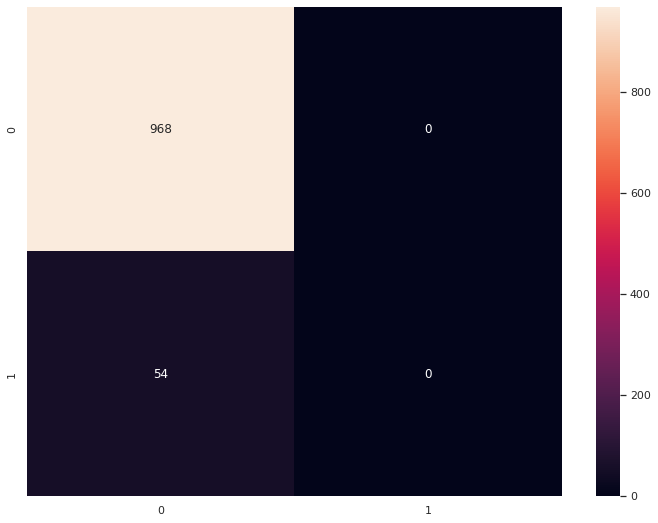

In [ ]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN (k=1000)

In [ ]:
KNN_model5 = KNeighborsClassifier(n_neighbors=1000)
KNN_model5.fit(X_train,y_train)
KNN_y_preds = KNN_model5.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
KNN_TP5 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP5 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN5 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN5 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP5,KNN_FP5,KNN_FN5,KNN_TN5)
print("Rightly Classified: ",(KNN_TP5+KNN_TN5),"/",(KNN_TP5+KNN_FP5+KNN_FN5+KNN_TN5))
print("Wrongly Classified: ",(KNN_FP5+KNN_FN5),"/",(KNN_TP5+KNN_FP5+KNN_FN5+KNN_TN5))

KNN_Accuracy5 = (KNN_TP5+KNN_TN5)/(KNN_TP5+KNN_FP5+KNN_FN5+KNN_TN5)
# KNN_Precision5 = (KNN_TP5)/(KNN_TP5+KNN_FP5)
KNN_Recall5 = (KNN_TP5)/(KNN_TP5+KNN_FN5)
KNN_Specificity5 = (KNN_TN5)/(KNN_TN5+KNN_FP5)
# KNN_F15 = (2*KNN_Precision5*KNN_Recall5)/(KNN_Precision5+KNN_Recall5)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


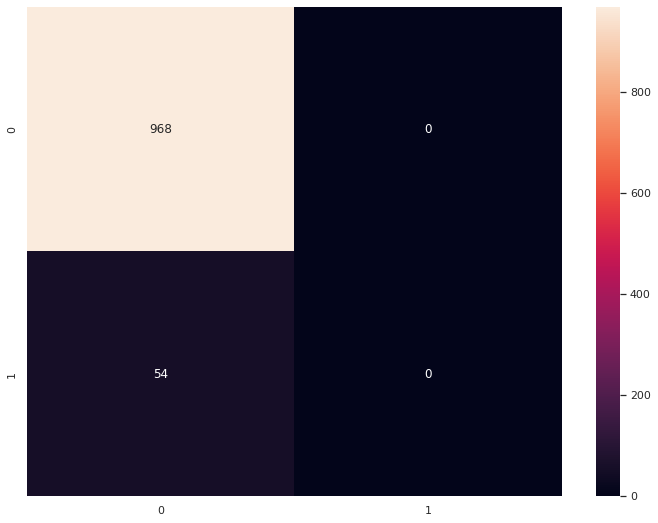

In [ ]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN (k=4000)

In [ ]:
KNN_model6 = KNeighborsClassifier(n_neighbors=4000)
KNN_model6.fit(X_train,y_train)
KNN_y_preds = KNN_model6.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
y_train.value_counts()

0.0    3891
1.0     193
Name: stroke, dtype: int64

In [ ]:
KNN_TP6 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP6 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN6 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN6 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP6,KNN_FP6,KNN_FN6,KNN_TN6)
print("Rightly Classified: ",(KNN_TP6+KNN_TN6),"/",(KNN_TP6+KNN_FP6+KNN_FN6+KNN_TN6))
print("Wrongly Classified: ",(KNN_FP6+KNN_FN6),"/",(KNN_TP6+KNN_FP6+KNN_FN6+KNN_TN6))

KNN_Accuracy6 = (KNN_TP6+KNN_TN6)/(KNN_TP6+KNN_FP6+KNN_FN6+KNN_TN6)
# KNN_Precision6 = (KNN_TP6)/(KNN_TP6+KNN_FP6)
KNN_Recall6 = (KNN_TP6)/(KNN_TP6+KNN_FN6)
KNN_Specificity6 = (KNN_TN6)/(KNN_TN6+KNN_FP6)
# KNN_F16 = (2*KNN_Precision6*KNN_Recall6)/(KNN_Precision6+KNN_Recall6)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


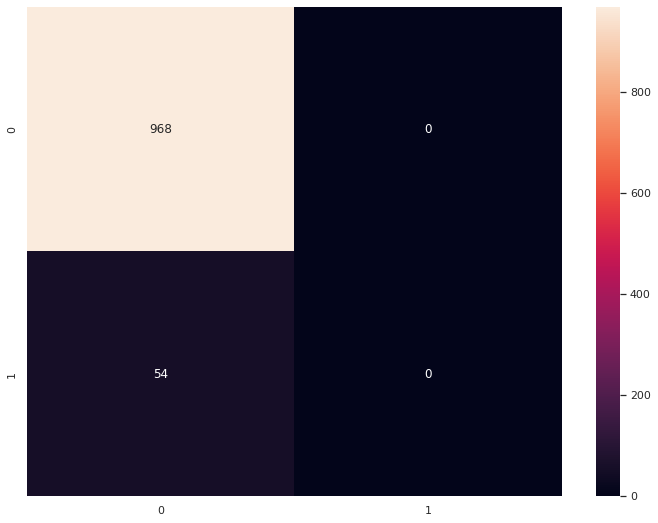

In [ ]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM (Support Vector Machine)

In [ ]:
from sklearn import svm

SVM_model = svm.SVC()
SVM_model.fit(X_train,y_train)
SVM_y_preds = SVM_model.predict(X_test)
SVM_preds = pd.DataFrame({"Predicted":SVM_y_preds,"Actual":y_test})
SVM_preds

,Predicted,Actual
42,0.0,1.0
3777,0.0,0.0
3792,0.0,0.0
3957,0.0,0.0
4626,0.0,0.0
...,...,...
3272,0.0,0.0
4201,0.0,0.0
248,0.0,1.0
4646,0.0,0.0


In [ ]:
SVM_TP = len(SVM_preds[(SVM_preds["Predicted"]==SVM_preds["Actual"])&(SVM_preds["Predicted"]==1)])
SVM_FP = len(SVM_preds[(SVM_preds["Predicted"]!=SVM_preds["Actual"])&(SVM_preds["Predicted"]==1)])
SVM_FN = len(SVM_preds[(SVM_preds["Predicted"]!=SVM_preds["Actual"])&(SVM_preds["Predicted"]==0)])
SVM_TN = len(SVM_preds[(SVM_preds["Predicted"]==SVM_preds["Actual"])&(SVM_preds["Predicted"]==0)])
print(SVM_TP,SVM_FP,SVM_FN,SVM_TN)
print("Rightly Classified: ",(SVM_TP+SVM_TN),"/",(SVM_TP+SVM_FP+SVM_FN+SVM_TN))
print("Wrongly Classified: ",(SVM_FP+SVM_FN),"/",(SVM_TP+SVM_FP+SVM_FN+SVM_TN))

SVM_Accuracy = (SVM_TP+SVM_TN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN)
# SVM_Precision = (SVM_TP)/(SVM_TP+SVM_FP)
SVM_Recall = (SVM_TP)/(SVM_TP+SVM_FN)
SVM_Specificity = (SVM_TN)/(SVM_TN+SVM_FP)
# SVM_F1 = (2*SVM_Precision*SVM_Recall)/(SVM_Precision+SVM_Recall)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


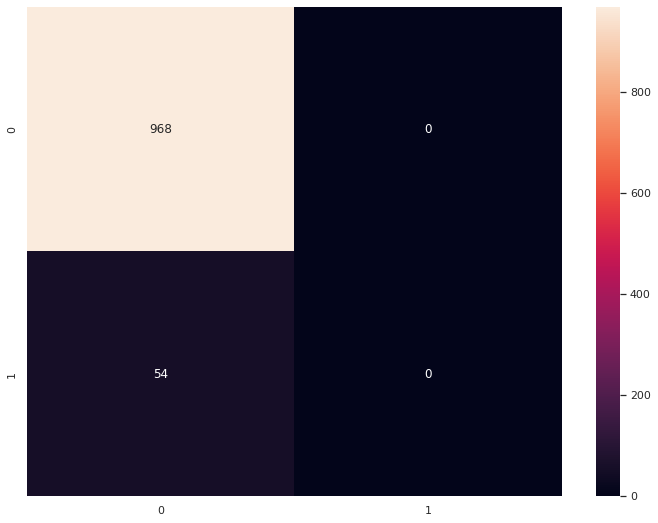

In [ ]:
SVM_Confusion_matrix = confusion_matrix(y_test, SVM_y_preds)
sns.heatmap(SVM_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, SVM_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-Means Clustering

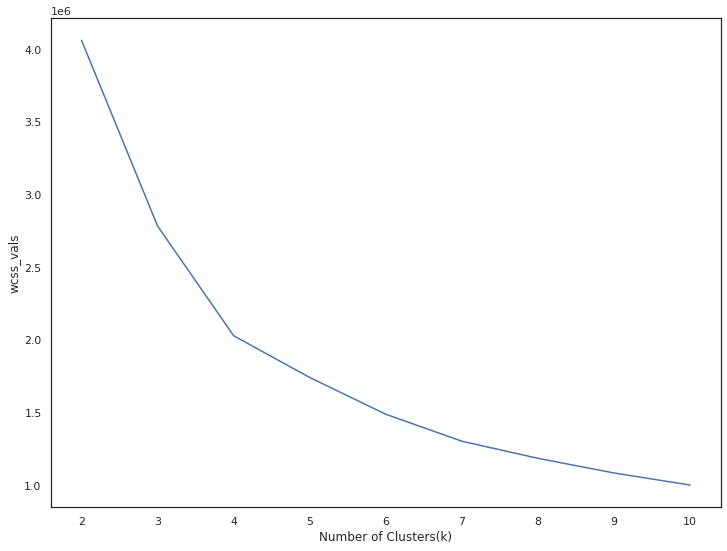

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
i_vals = []

for i in range(2,11):
  i_vals.append(i)
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

plt.plot(i_vals,wcss)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_vals')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,init="random",random_state=42)
kmeans.fit(X_train)
KMeans_y_preds = kmeans.predict(X_test)
KMeans_preds = pd.DataFrame({"Predicted":KMeans_y_preds,"Actual":y_test})
KMeans_preds

,Predicted,Actual
42,0,1.0
3777,1,0.0
3792,1,0.0
3957,1,0.0
4626,1,0.0
...,...,...
3272,1,0.0
4201,0,0.0
248,1,1.0
4646,1,0.0


In [ ]:
Kmeans_TP = len(KMeans_preds[(KMeans_preds["Predicted"]==KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==1)])
Kmeans_FP = len(KMeans_preds[(KMeans_preds["Predicted"]!=KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==1)])
Kmeans_FN = len(KMeans_preds[(KMeans_preds["Predicted"]!=KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==0)])
Kmeans_TN = len(KMeans_preds[(KMeans_preds["Predicted"]==KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==0)])
print(Kmeans_TP,Kmeans_FP,Kmeans_FN,Kmeans_TN)
print("Rightly Classified: ",(Kmeans_TP+Kmeans_TN),"/",(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN))
print("Wrongly Classified: ",(Kmeans_FP+Kmeans_FN),"/",(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN))

Kmeans_Accuracy = (Kmeans_TP+Kmeans_TN)/(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN)
Kmeans_Precision = (Kmeans_TP)/(Kmeans_TP+Kmeans_FP)
Kmeans_Recall = (Kmeans_TP)/(Kmeans_TP+Kmeans_FN)
Kmeans_Specificity = (Kmeans_TN)/(Kmeans_TN+Kmeans_FP)
Kmeans_F1 = (2*Kmeans_Precision*Kmeans_Recall)/(Kmeans_Precision+Kmeans_Recall)

25 851 29 117
Rightly Classified:  142 / 1022
Wrongly Classified:  880 / 1022


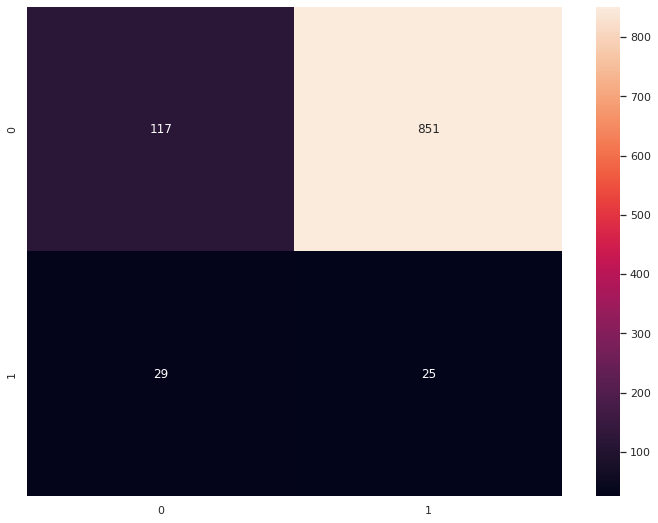

In [ ]:
Kmeans_Confusion_matrix = confusion_matrix(y_test, KMeans_y_preds)
sns.heatmap(Kmeans_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, KMeans_y_preds))

              precision    recall  f1-score   support

         0.0       0.80      0.12      0.21       968
         1.0       0.03      0.46      0.05        54

    accuracy                           0.14      1022
   macro avg       0.41      0.29      0.13      1022
weighted avg       0.76      0.14      0.20      1022



# Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Acluster = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
Acluster.fit(X_train)
Acluster_y_preds = Acluster.fit_predict(X_test)
Acluster_preds = pd.DataFrame({"Predicted":Acluster_y_preds,"Actual":y_test})
Acluster_preds

,Predicted,Actual
42,0,1.0
3777,0,0.0
3792,0,0.0
3957,0,0.0
4626,0,0.0
...,...,...
3272,0,0.0
4201,1,0.0
248,0,1.0
4646,0,0.0


In [ ]:
Acluster_TP = len(Acluster_preds[(Acluster_preds["Predicted"]==Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==1)])
Acluster_FP = len(Acluster_preds[(Acluster_preds["Predicted"]!=Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==1)])
Acluster_FN = len(Acluster_preds[(Acluster_preds["Predicted"]!=Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==0)])
Acluster_TN = len(Acluster_preds[(Acluster_preds["Predicted"]==Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==0)])
print(Acluster_TP,Acluster_FP,Acluster_FN,Acluster_TN)
print("Rightly Classified: ",(Acluster_TP+Acluster_TN),"/",(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN))
print("Wrongly Classified: ",(Acluster_FP+Acluster_FN),"/",(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN))

Acluster_Accuracy = (Acluster_TP+Acluster_TN)/(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN)
Acluster_Precision = (Acluster_TP)/(Acluster_TP+Acluster_FP)
Acluster_Recall = (Acluster_TP)/(Acluster_TP+Acluster_FN)
Acluster_Specificity = (Acluster_TN)/(Acluster_TN+Acluster_FP)
Acluster_F1 = (2*Acluster_Precision*Acluster_Recall)/(Acluster_Precision+Acluster_Recall)

27 88 27 880
Rightly Classified:  907 / 1022
Wrongly Classified:  115 / 1022


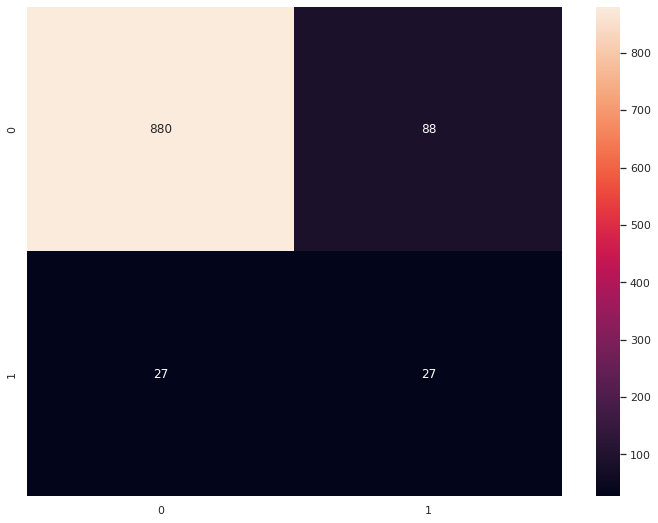

In [ ]:
Acluster_Confusion_matrix = confusion_matrix(y_test, Acluster_y_preds)
sns.heatmap(Acluster_Confusion_matrix, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, Acluster_y_preds))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       968
         1.0       0.23      0.50      0.32        54

    accuracy                           0.89      1022
   macro avg       0.60      0.70      0.63      1022
weighted avg       0.93      0.89      0.91      1022



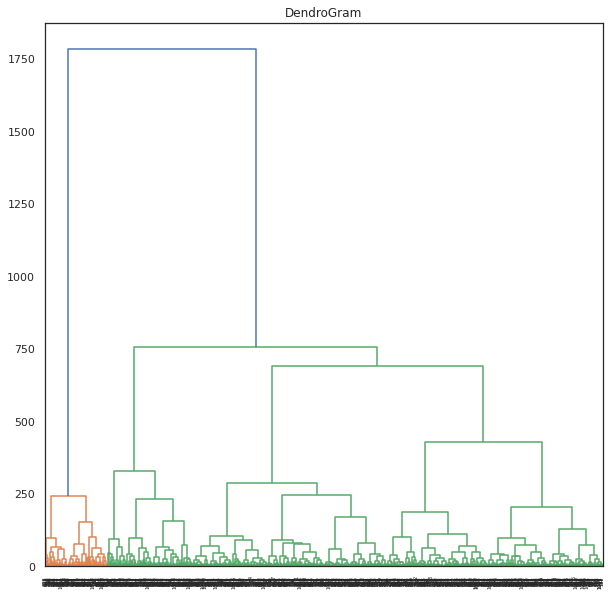

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,10))
plt.title("DendroGram")
dendo = shc.dendrogram(shc.linkage(X_test,method="ward"))

In [ ]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
42,82.0,0.0,1.0,144.90,26.4,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3777,17.0,0.0,0.0,68.66,35.1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3792,74.0,0.0,0.0,130.37,26.3,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3957,38.0,0.0,0.0,98.37,27.2,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4626,33.0,0.0,0.0,90.73,32.8,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,46.0,0.0,0.0,102.27,38.9,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4201,43.0,0.0,0.0,207.37,29.5,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
248,78.0,0.0,0.0,78.81,19.6,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4646,63.0,0.0,0.0,93.88,34.8,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


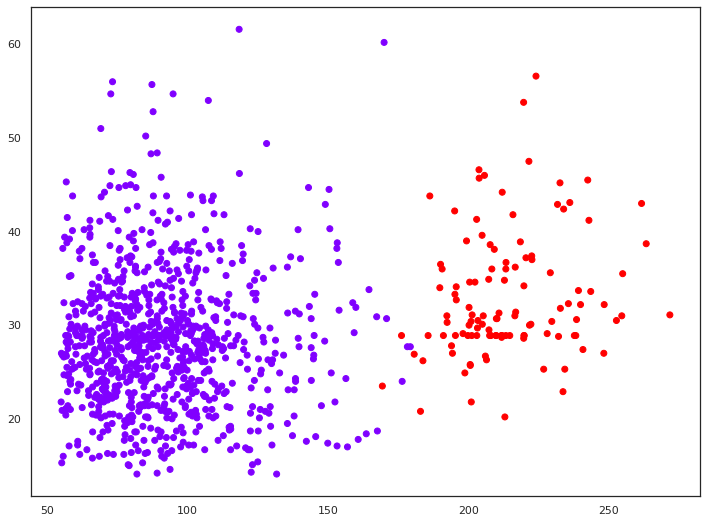

In [ ]:
plt.scatter(X_test["avg_glucose_level"].values,X_test["bmi"].values,c=Acluster.labels_,cmap ='rainbow')

# Final Comparison

In [ ]:
comparison = pd.DataFrame({"ML Classification Algo":["Decision_Tree","LGBM Classifier","CatBoost Classifier (1000 iterations)","CatBoost Classifier (300 iterations)","XGBoosting","Logistic Regression","Random Forest (Max 2 features in Bootstraping)","Random Forest (Max 5 features in Bootstraping)","Random Forest (Max 10 features in Bootstraping)","Random Forest (Max 18 features in Bootstraping)","Gaussian Naive Bayes","KNN (k=10)","KNN (k=50)","KNN (k=200)","KNN (k=500)","KNN (k=1000)","KNN (k=4000)","SVM (Support Vector Machine)","K-Means Clustering","Agglomerative Clustering"],
 "Rightly_Classified":[(Decision_TP+Decision_TN)/(Decision_TP+Decision_FP+Decision_FN+Decision_TN),(LGBM_TP+LGBM_TN)/(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN),(CatBoost_TP+CatBoost_TN)/(CatBoost_TP+CatBoost_FP+CatBoost_FN+CatBoost_TN),(CatBoost_TP2+CatBoost_TN2)/(CatBoost_TP2+CatBoost_FP2+CatBoost_FN2+CatBoost_TN2),(XGB_TP+XGB_TN)/(XGB_TP+XGB_FP+XGB_FN+XGB_TN),(Log_TP+Log_TN)/(Log_TP+Log_FP+Log_FN+Log_TN),(RF_TP1+RF_TN1)/(RF_TP1+RF_FP1+RF_FN1+RF_TN1),(RF_TP2+RF_TN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2),(RF_TP3+RF_TN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3),(RF_TP4+RF_TN4)/(RF_TP4+RF_FP4+RF_FN4+RF_TN4),(GNB_TP+GNB_TN)/(GNB_TP+GNB_FP+GNB_FN+GNB_TN),(KNN_TP1+KNN_TN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1),(KNN_TP2+KNN_TN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2),(KNN_TP3+KNN_TN3)/(KNN_TP3+KNN_FP3+KNN_FN3+KNN_TN3),(KNN_TP4+KNN_TN4)/(KNN_TP4+KNN_FP4+KNN_FN4+KNN_TN4),(KNN_TP5+KNN_TN5)/(KNN_TP5+KNN_FP5+KNN_FN5+KNN_TN5),(KNN_TP6+KNN_TN6)/(KNN_TP6+KNN_FP6+KNN_FN6+KNN_TN6),(SVM_TP+SVM_TN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN),(Kmeans_TP+Kmeans_TN)/(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN),(Acluster_TP+Acluster_TN)/(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN)],
 "Wrongly_Classified":[(Decision_FP+Decision_FN)/(Decision_TP+Decision_FP+Decision_FN+Decision_TN),(LGBM_FP+LGBM_FN)/(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN),(CatBoost_FP+CatBoost_FN)/(CatBoost_TP+CatBoost_FP+CatBoost_FN+CatBoost_TN),(CatBoost_FP2+CatBoost_FN2)/(CatBoost_TP2+CatBoost_FP2+CatBoost_FN2+CatBoost_TN2),(XGB_FP+XGB_FN)/(XGB_TP+XGB_FP+XGB_FN+XGB_TN),(Log_FP+Log_FN)/(Log_TP+Log_FP+Log_FN+Log_TN),(RF_FP1+RF_FN1)/(RF_TP1+RF_FP1+RF_FN1+RF_TN1),(RF_FP2+RF_FN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2),(RF_FP3+RF_FN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3),(RF_FP4+RF_FN4)/(RF_TP4+RF_FP4+RF_FN4+RF_TN4),(GNB_FP+GNB_FN)/(GNB_TP+GNB_FP+GNB_FN+GNB_TN),(KNN_FP1+KNN_FN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1),(KNN_FP2+KNN_FN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2),(KNN_FP3+KNN_FN3)/(KNN_TP3+KNN_FP3+KNN_FN3+KNN_TN3),(KNN_FP4+KNN_FN4)/(KNN_TP4+KNN_FP4+KNN_FN4+KNN_TN4),(KNN_FP5+KNN_FN5)/(KNN_TP5+KNN_FP5+KNN_FN5+KNN_TN5),(KNN_FP6+KNN_FN6)/(KNN_TP6+KNN_FP6+KNN_FN6+KNN_TN6),(SVM_FP+SVM_FN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN),(Kmeans_FP+Kmeans_FN)/(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN),(Acluster_FP+Acluster_FN)/(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN)],
 "Accuracy":[Decision_Accuracy,LGBM_Accuracy,CatBoost_Accuracy,CatBoost_Accuracy2,XGB_Accuracy,Log_Accuracy,RF_Accuracy1,RF_Accuracy2,RF_Accuracy3,RF_Accuracy4,GNB_Accuracy,KNN_Accuracy1,KNN_Accuracy2,KNN_Accuracy3,KNN_Accuracy4,KNN_Accuracy5,KNN_Accuracy6,SVM_Accuracy,Kmeans_Accuracy,Acluster_Accuracy],
#  "Precision":[Decision_Precision,LGBM_Precision,CatBoost_Precision,CatBoost_Precision2,XGB_Precision,Log_Precision,RF_Precision1,RF_Precision2,RF_Precision3,RF_Precision4,GNB_Precision,KNN_Precision1,KNN_Precision2,KNN_Precision3,KNN_Precision4,KNN_Precision5,KNN_Precision6,SVM_Precision,Kmeans_Precision,Acluster_Precision],
 "Recall":[Decision_Recall,LGBM_Recall,CatBoost_Recall,CatBoost_Recall2,XGB_Recall,Log_Recall,RF_Recall1,RF_Recall2,RF_Recall3,RF_Recall4,GNB_Recall,KNN_Recall1,KNN_Recall2,KNN_Recall3,KNN_Recall4,KNN_Recall5,KNN_Recall6,SVM_Recall,Kmeans_Recall,Acluster_Recall],
 "Specificity":[Decision_Specificity,LGBM_Specificity,CatBoost_Specificity,CatBoost_Specificity2,XGB_Specificity,Log_Specificity,RF_Specificity1,RF_Specificity2,RF_Specificity3,RF_Specificity4,GNB_Specificity,KNN_Specificity1,KNN_Specificity2,KNN_Specificity3,KNN_Specificity4,KNN_Specificity5,KNN_Specificity6,SVM_Specificity,Kmeans_Specificity,Acluster_Specificity]})
#  "F1-Score":[Decision_F1,LGBM_F1,CatBoost_F1,CatBoost_F12,XGB_F1,Log_F1,RF_F11,RF_F12,RF_F13,RF_F14,GNB_F1,KNN_F11,KNN_F12,KNN_F13,KNN_F14,KNN_F15,KNN_F16,SVM_F1,Kmeans_F1,Acluster_F1]})

comparison.sort_values(by="Accuracy",ascending=False).style.background_gradient(cmap='rocket')

,ML Classification Algo,Rightly_Classified,Wrongly_Classified,Accuracy,Recall,Specificity
5,Logistic Regression,0.953033,0.046967,0.953033,0.023810,0.992857
16,KNN (k=4000),0.947162,0.052838,0.947162,0.000000,1.000000
14,KNN (k=500),0.947162,0.052838,0.947162,0.000000,1.000000
15,KNN (k=1000),0.947162,0.052838,0.947162,0.000000,1.000000
4,XGBoosting,0.947162,0.052838,0.947162,0.000000,1.000000
17,SVM (Support Vector Machine),0.947162,0.052838,0.947162,0.000000,1.000000
11,KNN (k=10),0.947162,0.052838,0.947162,0.000000,1.000000
12,KNN (k=50),0.947162,0.052838,0.947162,0.000000,1.000000
13,KNN (k=200),0.947162,0.052838,0.947162,0.000000,1.000000
3,CatBoost Classifier (300 iterations),0.946184,0.053816,0.946184,0.037037,0.996901
